In [2]:
## REQUIERE QUE ARCHIVOS DE ENTRADA Y DE PARAMETROS ESTEN EN LA MISMA CARPETA (o DIRECTORIO) 

## RESPETAR ORDEN DE COLUMNAS DATAFRAME

In [6]:
## IMPORTACION LIBRERIAS

import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString, Polygon

from mpl_toolkits import mplot3d
%matplotlib inline

In [7]:
import os
import numpy as np
import pandas as pd
import re
from unidecode import unidecode
from tqdm.notebook import trange, tqdm
import time
import math

In [8]:


## Lectura archivo de parámetros:
'''       '    como texto separador 
'''

os.listdir()     #Archivos de parámetros:   'CLAG1.par', 'localcap.run'

print(open("CLAG1.par", "r").read())
                                #print(f.readlines())     <-- En caso testear caracteres ocultos


'''     Para evitar errores futuros se utiliza RegEx (En función del separador y no de la posición)
        cada linea del archivo de parámetros tiene un   '     como separador 
        --> separación tipo:       VALOR PARAMËTRO    '    NOMBRE  PARÄMETRO
'''

open("CLAG1.par", "r").close()

Capping Test Copper Using BHID                                            '\header
D:\001_CLOCAL_GRP1\CLAG_MR2022.csv                                        '\input file
1,2,3,4,6,5,7,8                                                           '\columns for data, Record Number,x,y,z,code,grade,zone
30.,30.,30.                                                               '\initial search volume
6                                                                         '\Number of Risk Thresholds to consider (maximum of 6)
0.100,0.125,0.150,0.175,0.200,0.225                                       '\selected risk thresholds
21                                                                        '\number of data in local volume
21                                                                        '\number of units
1,2,10,11,13,14,16,19,20,22,23,31,32,34,35,36,37,50,51,52,53              '\unit names
0                                                                         '\do not con

In [9]:
l=[re.split("[']", x) for x in open("CLAG1.par", "r")]
    #print(x)
open("CLAG1.par", "r").close()            #cerrar archivo 


## diccionario de parámetros
param={}
param_l=[]
paran_v=[]

## OJO!! 
# Separador no es el mismo en todos los SO -->  Usar OS

l[0][1].strip() #     ==  os.sep


'\\header'

In [10]:
## header:          PARÁMETRO 1

param[1]=l[0][0].strip()
param_l.append(l[0][1].strip().replace(os.sep,""))

## input file:          PARÁMETRO 2

param[2]=l[1][0].strip().rsplit(os.sep, 1)[-1]
param_l.append(l[1][1].strip().replace(os.sep,""))

## columns for data:          PARÁMETRO 3

param[3]=[int(x) for x in l[2][0].strip().split(",")]
param_l.append(l[2][1].strip().replace(os.sep,"")[0:16])

## initial search volume:          PARÁMETRO 4

param[4]=[float(x) for x in l[3][0].strip().split(",")]
param_l.append(l[3][1].strip().replace(os.sep,""))

## Number of Risk Thresholds:          PARÁMETRO 5

param[5]=[int(x) for x in l[4][0].strip().split(",")]
param_l.append(l[4][1].strip().replace(os.sep,"")[0:37])

## Selected risk thresholds:          PARÁMETRO 6

param[6]=[float(x) for x in l[5][0].strip().split(",")]
param_l.append(l[5][1].strip().replace(os.sep,""))

## Number of data in local volume:          PARÁMETRO 7

param[7]=[int(x) for x in l[6][0].strip().split(",")]
param_l.append(l[6][1].strip().replace(os.sep,""))

## Number of units:          PARÁMETRO 8

param[8]=[int(x) for x in l[7][0].strip().split(",")]
param_l.append(l[7][1].strip().replace(os.sep,""))

## Unit names:          PARÁMETRO 9

param[9]=[int(x) for x in l[8][0].strip().split(",")]
param_l.append(l[8][1].strip().replace(os.sep,""))

## not consider values less than:          PARÁMETRO 10

param[10]=[int(x) for x in l[9][0].strip().split(",")]
param_l.append(l[9][1].strip().replace(os.sep,""))

## output files name:          PARÁMETRO 11

param[11]=l[10][0].strip().rsplit(os.sep, 1)[-1]
param_l.append(l[10][1].strip().replace(os.sep,""))

## number of zones:          PARÁMETRO 12

param[12]=[int(x) for x in l[11][0].strip().split(",")]
param_l.append(l[11][1].strip().replace(os.sep,""))

## zone identifiers:          PARÁMETRO 13

param[13]=[int(x) for x in l[12][0].strip().split(",")]
param_l.append(l[12][1].strip().replace(os.sep,""))

## azimuth of search orientation per zone :          PARÁMETRO 14

param[14]=[int(x) for x in l[13][0].strip().split(",")]
param_l.append(l[13][1].strip().replace(os.sep,""))

## Anisotropy ratios:          PARÁMETRO 15

param[15]=[float(x) for x in l[14][0].strip().split(",")]
param_l.append(l[14][1].strip().replace(os.sep,""))

## Exclude data from the same drillhole:          PARÁMETRO 16

param[16]=[int(x) for x in l[15][0].strip().split(",")]
param_l.append(l[15][1].strip().replace(os.sep,""))

## Option to weight data by search expansion:          PARÁMETRO 17

param[17]=[int(x) for x in l[16][0].strip().split(",")]
param_l.append(l[16][1].strip().replace(os.sep,""))


In [11]:
df_parametros = pd.DataFrame(list(zip(list(range(1,18)), param_l, list(param.values()))),
                             columns=['Orden','Descripcion', 'Valor']
                            )
df_parametros

,Orden,Descripcion,Valor
0,1,header,Capping Test Copper Using BHID
1,2,input file,CLAG_MR2022.csv
2,3,columns for data,"[1, 2, 3, 4, 6, 5, 7, 8]"
3,4,initial search volume,"[30.0, 30.0, 30.0]"
4,5,Number of Risk Thresholds to consider,[6]
5,6,selected risk thresholds,"[0.1, 0.125, 0.15, 0.175, 0.2, 0.225]"
6,7,number of data in local volume,[21]
7,8,number of units,[21]
8,9,unit names,"[1, 2, 10, 11, 13, 14, 16, 19, 20, 22, 23, 31,..."
9,10,do not consider values less than,[0]


In [12]:
# $$   LECTURA ARCHIVO INICIAL

df_CLAG_MR_2022 = pd.read_csv(param[2])
df_CLAG_MR_2022.head(2)
## Requerimiento: No NaN ni missing values

,COUNT,mid_x,mid_y,mid_z,Ag_ppm_BESTEL,NBKRT,AG_SUBZONAS,HOLEID
0,2,3543.68,5036.82,4242.3,34.400002,31,22,A001
1,3,3543.68,5036.82,4239.3,10.190001,31,22,A001


In [13]:
# $$   FUNCION  NO MISSING  (REQUERIMIENTO DE DATASET)

'''
Algoritmo localcapping no admite valores nulos ni missings
función missing_val(df) identifica casos missing y nulos
'''

def missing_val(df):
    cero_val = (df == 0.00).astype(int).sum(axis=0)
    mis_val = df.isnull().sum()
    mz_table = pd.concat([cero_val, mis_val], axis=1)
    mz_table = mz_table.rename(
               columns = {0 : 'Valores  Cero', 1 : 'Valores Missing'})
    mz_table['Total Cero + Missing'] = mz_table['Valores  Cero'] + mz_table['Valores Missing']
    mz_table = mz_table[mz_table.iloc[:,1] != 0].round(1)
    print ("Df Columnas: " + str(df.shape[1]) + " Df Filas: " + str(df.shape[0]) + " \n"      
            "Columnas con Ceros / Missing: " + str(mz_table.shape[0]))
    return mz_table

## 
missing_val(df_CLAG_MR_2022)       

Df Columnas: 8 Df Filas: 379769 
Columnas con Ceros / Missing: 0


,Valores Cero,Valores Missing,Total Cero + Missing


In [14]:
df_CLAG_MR_2022

,COUNT,mid_x,mid_y,mid_z,Ag_ppm_BESTEL,NBKRT,AG_SUBZONAS,HOLEID
0,2,3543.68,5036.82,4242.30,34.400002,31,22,A001
1,3,3543.68,5036.82,4239.30,10.190001,31,22,A001
2,4,3543.68,5036.82,4236.30,6.200000,31,22,A001
3,5,3543.68,5036.82,4233.30,9.640000,31,22,A001
4,6,3543.68,5036.82,4230.90,43.711109,31,22,A001
...,...,...,...,...,...,...,...,...
379764,398125,3958.75,6238.25,4377.40,0.150000,11,12,AC5
379765,398126,3958.75,6238.25,4374.40,0.150000,11,12,AC5
379766,398127,3958.75,6238.25,4371.50,0.150000,11,12,AC5
379767,398229,2912.63,4461.27,4102.73,0.150000,14,32,ADDH1


# ACONDICIONAMIENTO DATAFRAME

In [15]:
## $$$ ORDEMIENTODF

'''
Este ordenamiento no limita la seleccion decolumnas por nombre
Hace seleccion en funcion del orden inicial de columnas

'''

df_CLAG_MR_2022_R=df_CLAG_MR_2022[[df_CLAG_MR_2022.iloc[:,0].name,
                                   df_CLAG_MR_2022.iloc[:,1].name,
                                   df_CLAG_MR_2022.iloc[:,2].name,
                                   df_CLAG_MR_2022.iloc[:,3].name,
                                   df_CLAG_MR_2022.iloc[:,4].name,
                                   df_CLAG_MR_2022.iloc[:,5].name,
                                   df_CLAG_MR_2022.iloc[:,6].name,
                                   df_CLAG_MR_2022.iloc[:,7].name]]

df_CLAG_MR_2022=df_CLAG_MR_2022_R

df_CLAG_MR_2022.head(2)

,COUNT,mid_x,mid_y,mid_z,Ag_ppm_BESTEL,NBKRT,AG_SUBZONAS,HOLEID
0,2,3543.68,5036.82,4242.3,34.400002,31,22,A001
1,3,3543.68,5036.82,4239.3,10.190001,31,22,A001


In [16]:
##  $$$  INICILIZAR VALORES PARA 6 UMBRALES


df_CLAG_MR_2022["CAPVAL1"]=df_CLAG_MR_2022.iloc[:,4]
df_CLAG_MR_2022["CAPPED1"]=0

df_CLAG_MR_2022["CAPVAL2"]=df_CLAG_MR_2022.iloc[:,4]
df_CLAG_MR_2022["CAPPED2"]=0

df_CLAG_MR_2022["CAPVAL3"]=df_CLAG_MR_2022.iloc[:,4]
df_CLAG_MR_2022["CAPPED3"]=0

df_CLAG_MR_2022["CAPVAL4"]=df_CLAG_MR_2022.iloc[:,4]
df_CLAG_MR_2022["CAPPED4"]=0

df_CLAG_MR_2022["CAPVAL5"]=df_CLAG_MR_2022.iloc[:,4]
df_CLAG_MR_2022["CAPPED5"]=0

df_CLAG_MR_2022["CAPVAL6"]=df_CLAG_MR_2022.iloc[:,4]
df_CLAG_MR_2022["CAPPED6"]=0

df_CLAG_MR_2022["DUMMY_MODIF"]=0

df_CLAG_MR_2022.head(2)

,COUNT,mid_x,mid_y,mid_z,Ag_ppm_BESTEL,NBKRT,AG_SUBZONAS,HOLEID,CAPVAL1,CAPPED1,...,CAPPED2,CAPVAL3,CAPPED3,CAPVAL4,CAPPED4,CAPVAL5,CAPPED5,CAPVAL6,CAPPED6,DUMMY_MODIF
0,2,3543.68,5036.82,4242.3,34.400002,31,22,A001,34.400002,0,...,0,34.400002,0,34.400002,0,34.400002,0,34.400002,0,0
1,3,3543.68,5036.82,4239.3,10.190001,31,22,A001,10.190001,0,...,0,10.190001,0,10.190001,0,10.190001,0,10.190001,0,0


# FORMULA 
### ORDEN   II      SI      SD     ID

In [17]:
df_parametros.Valor[5]

[0.1, 0.125, 0.15, 0.175, 0.2, 0.225]

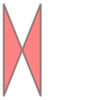

In [31]:
s = gpd.GeoSeries([Polygon([(x_SI, y_SI), (x_II,y_II), (x_SD, y_SD), (x_ID, y_ID)])])
s[0]

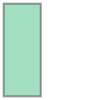

In [32]:
s = gpd.GeoSeries([Polygon([(x_II,y_II), (x_SI, y_SI), (x_SD, y_SD), (x_ID, y_ID)])])
s[0]

In [33]:
coords[0][0]

[4435.292219237741, 6361.444031283538]

In [34]:
(x_II,y_II)

(4458.6607, 6336.5579)

In [35]:
s.rotate(cartesiana, origin=(x,y))[0].exterior.coords.xy

(array('d', [4435.292219237741, 4492.745552471664, 4512.02918076226, 4454.575847528336, 4435.292219237741]),
 array('d', [6361.444031283538, 6409.653102010028, 6386.67176871646, 6338.4626979899695, 6361.444031283538]))

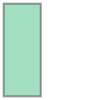

In [36]:
s = gpd.GeoSeries([Polygon([(x_II,y_II), (x_SI, y_SI), (x_SD, y_SD), (x_ID, y_ID)])])      
            ## RESPETAR ORDEN II SI SD ID
            
s[0]            

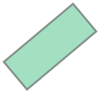

In [37]:
s.rotate(cartesiana, origin=(x,y))[0]

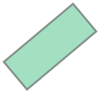

In [38]:
s.rotate(cartesiana, origin=(x,y))[0]

In [40]:
#df_CLAG_MR_2022[(df_CLAG_MR_2022.iloc[:, 5] == rock) & (df_CLAG_MR_2022.iloc[:, 6] == zone)]

In [50]:
#       %%%%%%%%%%%%%%%%%%%%%%%%%%

breaker=0
breaker2=0
conteo=0



inicio = time.time()



## azimuth esta asociado a la ZONA

iterador=0

#for zone in df_parametros.Valor[12][:1]:     ## borrar   [:2]
for zone in tqdm(df_parametros.Valor[12][:1]):     #################################  FIJO PARA PRUEBA  BORRAR
    
    
    
    #print("\n")
    print("zone:",zone)
    
    #  df_parametros.Valor[13]         ## LISTA DE AZIMUTH
    print("azimuth:",df_parametros.Valor[13][iterador])
    
    
    
    azimuth=df_parametros.Valor[13][iterador]
    cartesiana=0          ## <------ 


    if azimuth < 90:

        #print(1)
        cartesiana=90-azimuth 
        print(cartesiana)

    elif azimuth < 180:
        #print(2)
        cartesiana=360-(azimuth-90) 
        print(cartesiana)

    elif azimuth < 270:
        #print(3)
        cartesiana=270-(azimuth-180) 
        print(cartesiana)


    elif azimuth < 360:
        #print(4)
        cartesiana=180-(azimuth-270) 
        print(cartesiana)
        
        
        
    print("cartesiana:",cartesiana)
    rad=math.radians(cartesiana)    ## <------  APLICAR ACA SIN COS etc etc    
    print("radian:",rad)


    
    
    
    
    
    
    #df_parametros.Valor[14]                            ## LISTA DE ANISOTROPIA 
    print("ratio anisotropia:",df_parametros.Valor[14][iterador])
    ratio=df_parametros.Valor[14][iterador]
    
    
    ###  ITERAR ROCAS

    ###for rock in df_parametros.Valor[8][:1]:## borrar   [3]
    for rock in range(11,12):
        
        print("rock:",rock)
        print("\n")
        
        
        # $$ ITERAR COMPOSITOS:   ROCK y  ZONE  FIJO
        
        
        index_inner_3d=[]   ## INDICES COMPOSITOS INTERIORES a POLIGONO ROTADO 2D
        index_inner_3d.append(obs)
        
        for obs in df_CLAG_MR_2022[(df_CLAG_MR_2022.iloc[:, 5] == rock) & (df_CLAG_MR_2022.iloc[:, 6] == zone)].T:  ## ITERAR INDICES
            
            print(" index:",obs)
            
            # $$ PRINT COORDENADAS COMPOSITO
            
            x=df_CLAG_MR_2022[(df_CLAG_MR_2022.iloc[:, 5] == rock) & (df_CLAG_MR_2022.iloc[:, 6] == zone)].iloc[:,1][obs]
            y=df_CLAG_MR_2022[(df_CLAG_MR_2022.iloc[:, 5] == rock) & (df_CLAG_MR_2022.iloc[:, 6] == zone)].iloc[:,2][obs]
            z=df_CLAG_MR_2022[(df_CLAG_MR_2022.iloc[:, 5] == rock) & (df_CLAG_MR_2022.iloc[:, 6] == zone)].iloc[:,3][obs]
             
            print("   x:",x)
            print("   y:",y)
            print("   z:",z)          
            
            
            # $$ POLIGONO x COMPÓSITO   x,y                        ###  RATIO ANISOTROPIA APLICAR EN EJE  Y
            x_SI= x - (df_parametros.Valor[3][1] / 2)
            y_SI= y + ((df_parametros.Valor[3][2]*ratio) / 2)
            
            x_II= x - (df_parametros.Valor[3][1] / 2)
            y_II= y - ((df_parametros.Valor[3][2]*ratio) / 2)
            
            x_SD= x + (df_parametros.Valor[3][1] / 2)
            y_SD= y + ((df_parametros.Valor[3][2]*ratio) / 2)
            
            x_ID= x + (df_parametros.Valor[3][1] / 2)
            y_ID= y - ((df_parametros.Valor[3][2]*ratio) / 2)
            
            
            print("\n")        
            print("    SI:",x_SI,y_SI)
            print("    II:",x_II,y_II)  
            print("    SD:",x_SD,y_SD) 
            print("    ID:",x_ID,y_ID)

            
    
            s = gpd.GeoSeries([Polygon([(x_II,y_II), (x_SI, y_SI), (x_SD, y_SD), (x_ID, y_ID)])])      
            ## RESPETAR ORDEN II SI SD ID
            
            s[0]
            
            s.rotate(cartesiana, origin=(x,y))[0]
            
            rx,ry = s.rotate(cartesiana, origin=(x,y))[0].exterior.coords.xy
                 
            coords = np.dstack((rx,ry)).tolist()
            
            print("\n")

            #print(coords)           
            print("     SI_r: ",coords[0][0])
            print("     II_r: ",coords[0][1])
            print("     SD_r: ",coords[0][2])
            print("     ID_r: ",coords[0][3])
            

            print("\n")
            print("\n")
            
            
            ley=df_CLAG_MR_2022[(df_CLAG_MR_2022.iloc[:, 5] == rock) & (df_CLAG_MR_2022.iloc[:, 6] == zone)].iloc[:,4][obs]
            print("  ley: ",ley)
            
            
            
            print("\n")
            print("                 in-poligono")
            print("\n")
            
            

####################
####################  ITERACION POR COMPOSITO     DADO UN COMPOSITO GENERADOR DE VOLUMEN/SUPERFICIE            
            
            
            #####  ROTAR 1 sola vez el COMPOSITO GENERADOR
            rotate_obs=s.rotate(cartesiana, origin=(x,y))[0]   
        
            
            
            
            
            ##$        SI   df_parametros.Valor[15]     EXCLUIR MISMO POZO
            print("\n")
            
            if df_parametros.Valor[15][0]==1:
                print("      Ignorar mismo pozo    _    df_parametros.Valor[15] = 1",df_parametros.Valor[15])
                
            
                for obs_sub in df_CLAG_MR_2022[(df_CLAG_MR_2022.iloc[:, 5] == rock) & (df_CLAG_MR_2022.iloc[:, 6] == zone)].T:
                                     
                    

                    print("                    obs    : ",obs)         #COMPOSITO GENERADOR DE VOLUMEN/SUPERFICIE  
                    print("                    obs_sub: ",obs_sub)     #COMPOSITO a validar si es interno o no 
                    
                    
                    
                    print("                    pozo obs    : ",df_CLAG_MR_2022.loc[obs][7])         #COMPOSITO GENERADOR DE VOLUMEN/SUPERFICIE  
                    print("                    pozo obs_sub: ",df_CLAG_MR_2022.loc[obs_sub][7])     #COMPOSITO a validar si es interno o no 
                    
                    
                    ### $         SALTAR MISMO POZO
                    if df_CLAG_MR_2022.loc[obs_sub][7] == df_CLAG_MR_2022.loc[obs][7]:
                        continue                    
                    
   

                    #### ley del composito interno
                    sub_ley=df_CLAG_MR_2022[(df_CLAG_MR_2022.iloc[:, 5] == rock) & (df_CLAG_MR_2022.iloc[:, 6] == zone)].iloc[:,4][obs_sub]
                    print("                    ley_sub: ",sub_ley)

                

                    ####  Coordenadas x,y  composito interior
                    x_int=df_CLAG_MR_2022[(df_CLAG_MR_2022.iloc[:, 5] == rock) & (df_CLAG_MR_2022.iloc[:, 6] == zone)].T[obs_sub][1]
                    y_int=df_CLAG_MR_2022[(df_CLAG_MR_2022.iloc[:, 5] == rock) & (df_CLAG_MR_2022.iloc[:, 6] == zone)].T[obs_sub][2]

                    print("                    x_sub: ",x_int)
                    print("                    y_sub: ",y_int)


                    ##$  COMPONER COORDENADAS en objeto GEOPANDAS
                    composito_inter= gpd.GeoSeries([Point(x_int,y_int)])

                    conteo=conteo+1

                    
                    
                    print(".\n")
                    
                    #### COMPROBAR SI ESTA DENTRO DEL LOS LIMITES      ROTADO interseca PUHNTO INTERIOR
                    if rotate_obs.intersects(composito_inter[0]) == True:
                        print("                      TRUE  POLIGONO ROTADO 2D")

                        z_int=df_CLAG_MR_2022[(df_CLAG_MR_2022.iloc[:, 5] == rock) & (df_CLAG_MR_2022.iloc[:, 6] == zone)].T[obs_sub][3]
                        print("                    z_sub: ",z_int)

                        print("                    z:  ",z)
                        print("                    z_interior  ",z_int)
                        print("                    diferencia en eje z  ",abs(z-z_int))

                        z_inner_diff=abs(z-z_int)

                        if z_inner_diff < ((df_parametros.Valor[3][2]*ratio) / 2):
                            print("                    EN Z 3D")
                            index_inner_3d.append(obs_sub)
                            print(index_inner_3d)
                            pass

                        else:
                            pass
                            print("                    NO Z 3D  (Si interior x,y  2D) <--")

                    else:
                        print("                      NO EN INTERIOR POLIGONO ROTADO 2D-")
                        #pass      

                    print(".\n")
                    
                    
                print("longitud inner index",len(index_inner_3d))

                
                if len(index_inner_3d)<20:

                    print(".\n")
                    #############  EXPANSIONES
                  

                    ratio_expansion=1.5     ########      RATIO EXPANSION        11 =  x:2594 * y:6487
                    expansiones_max=15
                    solido_inicial=df_parametros.Valor[3]
                    solido_anisotropia=df_parametros.Valor[3]*np.array([1,df_parametros.Valor[14][iterador],1])  ##df_parametros.Valor[14][0] iterar por zona

                    for expan in range(expansiones_max):

                        solido_anisotropia=solido_anisotropia*np.array([ratio_expansion,ratio_expansion,ratio_expansion])
                        print("expansion:",expan,"    ",solido_anisotropia)
                        
                        print("\n")
                        print(solido_anisotropia[0],solido_anisotropia[1],solido_anisotropia[2])
                        print("\n x_expan",expan," ",solido_anisotropia[0])
                        print("\n y_expan",expan," ",solido_anisotropia[1])
                        print("\n z_expan",expan," ",solido_anisotropia[2])
                        
                        
                        # $$ POLIGONO x COMPÓSITO   x,y                        ###  RATIO ANISOTROPIA APLICAR EN EJE  Y
                        x_SI_expan= x - (solido_anisotropia[0] / 2)
                        y_SI_expan= y + (solido_anisotropia[1] / 2)

                        x_II_expan= x - (solido_anisotropia[0] / 2)
                        y_II_expan= y - (solido_anisotropia[1] / 2)

                        x_SD_expan= x + (solido_anisotropia[0] / 2)
                        y_SD_expan= y + (solido_anisotropia[1] / 2)

                        x_ID_expan= x + (solido_anisotropia[0] / 2)
                        y_ID_expan= y - (solido_anisotropia[1] / 2)
                        
                        
                        
                        print("\n")        
                        print("              SI_expan:",expan,"  ",x_SI_expan,y_SI_expan)
                        print("              II_expan:",expan,"  ",x_II_expan,y_II_expan)  
                        print("              SD_expan:",expan,"  ",x_SD_expan,y_SD_expan) 
                        print("              ID_expan:",expan,"  ",x_ID_expan,y_ID_expan)
                        print("\n")
                        

                        print("\n")
                        print("                       x,y,z    COMPOSITO ")
                        print("   x:",x)
                        print("   y:",y)
                        print("   z:",z) 
                        print("\n")
                        

    ##########################      FRENO    FRENO    FRENO    FRENO    FRENO  FRENO    FRENO    FRENO     
                    #'''
                    ##      FRENOS   <------------------------------------------------------------
                    ## $$   FRENO            cantidad de  sub_inmdex         

                    breaker2=breaker2+1
                    if breaker2 > 10:
                        print("\n")
                        print("------   FRENO 2 sub iter")
                        break
                    print("\n")
                    #'''
    ####          FRENO    FRENO    FRENO    FRENO    FRENO    FRENO    FRENO    FRENO           



                print("\n")
                print("last_sub_index_list      ",index_inner_3d)
                print("\n")
                
                
###################################
                
                print(df_CLAG_MR_2022[(df_CLAG_MR_2022.iloc[:, 5] == rock) & (df_CLAG_MR_2022.iloc[:, 6] == zone)].T[index_inner_3d])

                print("\n")



                print(df_CLAG_MR_2022[(df_CLAG_MR_2022.iloc[:, 5] == rock) & (df_CLAG_MR_2022.iloc[:, 6] == zone)].T[index_inner_3d].iloc[[4]])

                print("\n")



                ## ley sub dataframe
                #print(df_CLAG_MR_2022[(df_CLAG_MR_2022.iloc[:, 5] == rock) & (df_CLAG_MR_2022.iloc[:, 6] == zone)].T[index_inner_3d].iloc[[4]])
                sub_df=df_CLAG_MR_2022[(df_CLAG_MR_2022.iloc[:, 5] == rock) & (df_CLAG_MR_2022.iloc[:, 6] == zone)].T[index_inner_3d].iloc[[4]].T
                print("\n")



                print(sub_df)
                print("\n")
                sub_df["percent_ley"] = (sub_df.iloc[:,0] / sub_df.iloc[:,0].sum()) 
                print("\n")



                print(sub_df)


                print("\n")

                print("  Umbrales",df_parametros.Valor[5])


                print("\n")
                print("ley promedio")
                print(sub_df.iloc[:,0].mean())



                print("\n")
                print("relativo aportado por el composito",sub_df.iloc[0,1])  ## procentaje del composito



                ##  TEST LEY ALTA   ELIMINAR
                ##sub_df.iloc[0,1]=0.2
                ###
                #########


                ##### ITERACION UMBRALES
                if sub_df.iloc[0,1] > df_parametros.Valor[5][0]:
                    print("--1")
                    print("valor umbral:", sub_df.iloc[0,1],df_parametros.Valor[5][0])
                    df_CLAG_MR_2022.iloc[obs,8]=sub_df.iloc[:,0].mean()
                    df_CLAG_MR_2022.iloc[obs,9]=ley-sub_df.iloc[:,0].mean()


                    if sub_df.iloc[0,1] > df_parametros.Valor[5][1]:
                        print("--2")
                        print("valor umbral:,",df_parametros.Valor[5][1])
                        df_CLAG_MR_2022.iloc[obs,10]=sub_df.iloc[:,0].mean()
                        df_CLAG_MR_2022.iloc[obs,11]=ley-sub_df.iloc[:,0].mean()

                        if sub_df.iloc[0,1] > df_parametros.Valor[5][2]:
                            print("--3")
                            print("valor umbral:,",df_parametros.Valor[5][2])
                            df_CLAG_MR_2022.iloc[obs,12]=sub_df.iloc[:,0].mean()
                            df_CLAG_MR_2022.iloc[obs,13]=ley-sub_df.iloc[:,0].mean()


                            if sub_df.iloc[0,1] > df_parametros.Valor[5][3]:
                                print("--4")
                                print("valor umbral:,",df_parametros.Valor[5][3])
                                df_CLAG_MR_2022.iloc[obs,14]=sub_df.iloc[:,0].mean()
                                df_CLAG_MR_2022.iloc[obs,15]=ley-sub_df.iloc[:,0].mean()


                                if sub_df.iloc[0,1] > df_parametros.Valor[5][4]:
                                    print("--5")
                                    print("valor umbral:,",df_parametros.Valor[5][4])
                                    df_CLAG_MR_2022.iloc[obs,16]=sub_df.iloc[:,0].mean()
                                    df_CLAG_MR_2022.iloc[obs,17]=ley-sub_df.iloc[:,0].mean()


                                    if sub_df.iloc[0,1] > df_parametros.Valor[5][5]:
                                        print("--6")
                                        print("valor umbral:",df_parametros.Valor[5][5])
                                        df_CLAG_MR_2022.iloc[obs,18]=sub_df.iloc[:,0].mean()
                                        df_CLAG_MR_2022.iloc[obs,19]=ley-sub_df.iloc[:,0].mean()

                else:
                    print("NO EN UMBRAL MINIMO")






                ######      FRENO    FRENO    FRENO    FRENO    FRENO    FRENO    FRENO    FRENO                
                            ## $$   FRENO            UNA SOLA ROCA Y ZONA         PARA UN COMPOSITO     

                breaker=breaker+1
                if breaker > 0:
                    print("freno_1")
                    break
                ##########################            FRENO    FRENO    FRENO    FRENO    FRENO    FRENO    FRENO    FRENO           


                print("\n\n\n\n")
  
                
                
                
                
                
            elif df_parametros.Valor[15][0]==0:
                print("      Aceptar mismo pozo    _    df_parametros.Valor[15] = 0",df_parametros.Valor[15])
                
                
                
                
                
                
                
            else:
                print("_PARAMETRO NO VALIDO_")
                break
            print("\n")    
            
            

    iterador=iterador+1
    
    
fin = time.time()
print("\n\n\n")
print("Tiempo en segundos",fin-inicio)

  0%|          | 0/1 [00:00<?, ?it/s]

zone: 11
azimuth: 140
310
cartesiana: 310
radian: 5.410520681182422
ratio anisotropia: 2.5
rock: 11


 index: 138472
   x: 4473.6607
   y: 6374.0579
   z: 4297.9178


    SI: 4458.6607 6411.5579
    II: 4458.6607 6336.5579
    SD: 4488.6607 6411.5579
    ID: 4488.6607 6336.5579


     SI_r:  [4435.292219237741, 6361.444031283538]
     II_r:  [4492.745552471664, 6409.653102010028]
     SD_r:  [4512.02918076226, 6386.67176871646]
     ID_r:  [4454.575847528336, 6338.4626979899695]




  ley:  0.5


                 in-poligono




      Ignorar mismo pozo    _    df_parametros.Valor[15] = 1 [1]
                    obs    :  138472
                    obs_sub:  138472
                    pozo obs    :  A1979
                    pozo obs_sub:  A1979
                    obs    :  138472
                    obs_sub:  138473
                    pozo obs    :  A1979
                    pozo obs_sub:  A1979
                    obs    :  138472
                    obs_sub:  138474
              

                    ley_sub:  0.5
                    x_sub:  4626.8915
                    y_sub:  6282.0228
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  139117
                    pozo obs    :  A1979
                    pozo obs_sub:  A1983
                    ley_sub:  0.633333
                    x_sub:  4628.4704
                    y_sub:  6281.6425
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  139118
                    pozo obs    :  A1979
                    pozo obs_sub:  A1983
                    ley_sub:  1.0
                    x_sub:  4630.049
                    y_sub:  6281.2612
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  139119
                    pozo obs    :  A1979
                    pozo obs_sub:  A1983
         

                    x_sub:  4675.3575
                    y_sub:  6269.1561
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  139148
                    pozo obs    :  A1979
                    pozo obs_sub:  A1983
                    ley_sub:  0.5
                    x_sub:  4676.912
                    y_sub:  6268.6977
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  139149
                    pozo obs    :  A1979
                    pozo obs_sub:  A1983
                    ley_sub:  0.5
                    x_sub:  4678.4686
                    y_sub:  6268.2388
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  139150
                    pozo obs    :  A1979
                    pozo obs_sub:  A1983
                    ley_sub:  0.5
              

                    ley_sub:  0.5
                    x_sub:  4728.0828
                    y_sub:  6252.5238
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  139181
                    pozo obs    :  A1979
                    pozo obs_sub:  A1983
                    ley_sub:  0.5
                    x_sub:  4729.6942
                    y_sub:  6251.9786
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  139182
                    pozo obs    :  A1979
                    pozo obs_sub:  A1983
                    ley_sub:  0.5
                    x_sub:  4731.3068
                    y_sub:  6251.431
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  139183
                    pozo obs    :  A1979
                    pozo obs_sub:  A1983
              

                    ley_sub:  0.5
                    x_sub:  4780.4852
                    y_sub:  6234.2628
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  139213
                    pozo obs    :  A1979
                    pozo obs_sub:  A1983
                    ley_sub:  0.5
                    x_sub:  4782.1472
                    y_sub:  6233.6653
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  139214
                    pozo obs    :  A1979
                    pozo obs_sub:  A1983
                    ley_sub:  0.5
                    x_sub:  4783.8086
                    y_sub:  6233.066
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  139215
                    pozo obs    :  A1979
                    pozo obs_sub:  A1983
              

.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  139243
                    pozo obs    :  A1979
                    pozo obs_sub:  A1983
                    ley_sub:  0.5
                    x_sub:  4832.511
                    y_sub:  6214.7402
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  139244
                    pozo obs    :  A1979
                    pozo obs_sub:  A1983
                    ley_sub:  0.5
                    x_sub:  4834.1925
                    y_sub:  6214.0803
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  139245
                    pozo obs    :  A1979
                    pozo obs_sub:  A1983
                    ley_sub:  0.5
                    x_sub:  4835.8728
                    y_sub:  6213.4184
.

           

                    x_sub:  4144.7679
                    y_sub:  6429.6448
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  145322
                    pozo obs    :  A1979
                    pozo obs_sub:  A2064
                    ley_sub:  3.795
                    x_sub:  4146.4441
                    y_sub:  6429.19
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  145323
                    pozo obs    :  A1979
                    pozo obs_sub:  A2064
                    ley_sub:  31.5
                    x_sub:  4148.1193
                    y_sub:  6428.7335
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  145324
                    pozo obs    :  A1979
                    pozo obs_sub:  A2064
                    ley_sub:  22.6
           

                    x_sub:  4197.7916
                    y_sub:  6415.1494
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  145353
                    pozo obs    :  A1979
                    pozo obs_sub:  A2064
                    ley_sub:  0.166667
                    x_sub:  4199.43
                    y_sub:  6414.7083
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  145354
                    pozo obs    :  A1979
                    pozo obs_sub:  A2064
                    ley_sub:  0.2
                    x_sub:  4201.0672
                    y_sub:  6414.2673
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  145355
                    pozo obs    :  A1979
                    pozo obs_sub:  A2064
                    ley_sub:  0.253333
     

                    x_sub:  4460.5755
                    y_sub:  6325.3929
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  157125
                    pozo obs    :  A1979
                    pozo obs_sub:  A2192
                    ley_sub:  0.5
                    x_sub:  4460.9924
                    y_sub:  6326.3121
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  157126
                    pozo obs    :  A1979
                    pozo obs_sub:  A2192
                    ley_sub:  0.5
                    x_sub:  4461.4096
                    y_sub:  6327.2273
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  157127
                    pozo obs    :  A1979
                    pozo obs_sub:  A2192
                    ley_sub:  0.5
             

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  157156
                    pozo obs    :  A1979
                    pozo obs_sub:  A2192
                    ley_sub:  0.5
                    x_sub:  4473.827
                    y_sub:  6352.8886
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  157157
                    pozo obs    :  A1979
                    pozo obs_sub:  A2192
                    ley_sub:  0.5
                    x_sub:  4474.2718
                    y_sub:  6353.7289
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  157158
                    pozo obs    :  A1979
                    pozo obs_sub:  A2192
                    ley_sub:  0.5
                    x_sub:  4474.7183
                    y_sub:  6354.5659
.

              

                    x_sub:  4483.5012
                    y_sub:  6370.0601
.

                      TRUE  POLIGONO ROTADO 2D
                    z_sub:  3715.5064
                    z:   4297.9178
                    z_interior   3715.5064
                    diferencia en eje z   582.4114
                    NO Z 3D  (Si interior x,y  2D) <--
.

                    obs    :  138472
                    obs_sub:  157178
                    pozo obs    :  A1979
                    pozo obs_sub:  A2192
                    ley_sub:  0.5
                    x_sub:  4483.9775
                    y_sub:  6370.8595
.

                      TRUE  POLIGONO ROTADO 2D
                    z_sub:  3712.6543
                    z:   4297.9178
                    z_interior   3712.6543
                    diferencia en eje z   585.2635
                    NO Z 3D  (Si interior x,y  2D) <--
.

                    obs    :  138472
                    obs_sub:  157179
                    pozo obs    : 

                    ley_sub:  0.5
                    x_sub:  4491.4018
                    y_sub:  6382.8893
.

                      TRUE  POLIGONO ROTADO 2D
                    z_sub:  3669.9329
                    z:   4297.9178
                    z_interior   3669.9329
                    diferencia en eje z   627.9849000000004
                    NO Z 3D  (Si interior x,y  2D) <--
.

                    obs    :  138472
                    obs_sub:  157194
                    pozo obs    :  A1979
                    pozo obs_sub:  A2192
                    ley_sub:  0.5
                    x_sub:  4491.9235
                    y_sub:  6383.7018
.

                      TRUE  POLIGONO ROTADO 2D
                    z_sub:  3667.0925
                    z:   4297.9178
                    z_interior   3667.0925
                    diferencia en eje z   630.8253
                    NO Z 3D  (Si interior x,y  2D) <--
.

                    obs    :  138472
                    obs_sub:

                    ley_sub:  0.5
                    x_sub:  4499.4501
                    y_sub:  6395.2618
.

                      TRUE  POLIGONO ROTADO 2D
                    z_sub:  3627.4228
                    z:   4297.9178
                    z_interior   3627.4228
                    diferencia en eje z   670.4950000000003
                    NO Z 3D  (Si interior x,y  2D) <--
.

                    obs    :  138472
                    obs_sub:  157209
                    pozo obs    :  A1979
                    pozo obs_sub:  A2192
                    ley_sub:  0.5
                    x_sub:  4500.0075
                    y_sub:  6396.0907
.

                      TRUE  POLIGONO ROTADO 2D
                    z_sub:  3624.5939
                    z:   4297.9178
                    z_interior   3624.5939
                    diferencia en eje z   673.3239000000003
                    NO Z 3D  (Si interior x,y  2D) <--
.

                    obs    :  138472
                   

                    ley_sub:  0.5
                    x_sub:  4826.3382
                    y_sub:  4976.8847
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  163598
                    pozo obs    :  A1979
                    pozo obs_sub:  A2247
                    ley_sub:  0.5
                    x_sub:  4826.2629
                    y_sub:  4978.4342
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  163599
                    pozo obs    :  A1979
                    pozo obs_sub:  A2247
                    ley_sub:  0.5
                    x_sub:  4826.1942
                    y_sub:  4979.8279
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  163600
                    pozo obs    :  A1979
                    pozo obs_sub:  A2247
             

                    x_sub:  4823.0062
                    y_sub:  5022.1094
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  163629
                    pozo obs    :  A1979
                    pozo obs_sub:  A2247
                    ley_sub:  0.5
                    x_sub:  4822.8537
                    y_sub:  5023.4834
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  163630
                    pozo obs    :  A1979
                    pozo obs_sub:  A2247
                    ley_sub:  0.5
                    x_sub:  4822.6983
                    y_sub:  5024.8516
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  163631
                    pozo obs    :  A1979
                    pozo obs_sub:  A2247
                    ley_sub:  0.5
             

                    ley_sub:  0.5
                    x_sub:  4900.1388
                    y_sub:  6252.0126
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  168673
                    pozo obs    :  A1979
                    pozo obs_sub:  A2285
                    ley_sub:  0.5
                    x_sub:  4901.1162
                    y_sub:  6252.5878
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  168674
                    pozo obs    :  A1979
                    pozo obs_sub:  A2285
                    ley_sub:  0.5
                    x_sub:  4902.0948
                    y_sub:  6253.1667
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  168675
                    pozo obs    :  A1979
                    pozo obs_sub:  A2285
             

                    ley_sub:  0.5
                    x_sub:  4930.045
                    y_sub:  6269.5879
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  168703
                    pozo obs    :  A1979
                    pozo obs_sub:  A2285
                    ley_sub:  0.5
                    x_sub:  4931.0918
                    y_sub:  6270.1708
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  168704
                    pozo obs    :  A1979
                    pozo obs_sub:  A2285
                    ley_sub:  0.5
                    x_sub:  4932.132
                    y_sub:  6270.7521
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  168705
                    pozo obs    :  A1979
                    pozo obs_sub:  A2285
               

                    x_sub:  5017.7614
                    y_sub:  5249.896
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  179362
                    pozo obs    :  A1979
                    pozo obs_sub:  A2392
                    ley_sub:  0.171667
                    x_sub:  5019.1785
                    y_sub:  5248.2139
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  179363
                    pozo obs    :  A1979
                    pozo obs_sub:  A2392
                    ley_sub:  0.326667
                    x_sub:  5020.409
                    y_sub:  5246.7498
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  179364
                    pozo obs    :  A1979
                    pozo obs_sub:  A2392
                    ley_sub:  0.601667


                    x_sub:  4471.7099
                    y_sub:  6508.2367
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  199046
                    pozo obs    :  A1979
                    pozo obs_sub:  A2613
                    ley_sub:  0.175
                    x_sub:  4473.2047
                    y_sub:  6506.7377
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  199047
                    pozo obs    :  A1979
                    pozo obs_sub:  A2613
                    ley_sub:  0.1
                    x_sub:  4474.698
                    y_sub:  6505.2385
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  199048
                    pozo obs    :  A1979
                    pozo obs_sub:  A2613
                    ley_sub:  0.175
          

                    ley_sub:  0.1
                    x_sub:  4519.9583
                    y_sub:  6458.6857
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  199078
                    pozo obs    :  A1979
                    pozo obs_sub:  A2613
                    ley_sub:  0.1
                    x_sub:  4521.4271
                    y_sub:  6457.1571
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  199079
                    pozo obs    :  A1979
                    pozo obs_sub:  A2613
                    ley_sub:  0.2
                    x_sub:  4522.8977
                    y_sub:  6455.6277
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  199080
                    pozo obs    :  A1979
                    pozo obs_sub:  A2613
             

                    x_sub:  4370.649
                    y_sub:  6493.0016
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  199260
                    pozo obs    :  A1979
                    pozo obs_sub:  A2615
                    ley_sub:  0.233333
                    x_sub:  4370.3013
                    y_sub:  6493.3829
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  199261
                    pozo obs    :  A1979
                    pozo obs_sub:  A2615
                    ley_sub:  0.1
                    x_sub:  4369.9532
                    y_sub:  6493.7635
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  199262
                    pozo obs    :  A1979
                    pozo obs_sub:  A2615
                    ley_sub:  0.133333
    

.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  211891
                    pozo obs    :  A1979
                    pozo obs_sub:  A2701
                    ley_sub:  0.1
                    x_sub:  4419.1494
                    y_sub:  6422.6267
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  211892
                    pozo obs    :  A1979
                    pozo obs_sub:  A2701
                    ley_sub:  0.1
                    x_sub:  4418.525
                    y_sub:  6423.2394
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  211893
                    pozo obs    :  A1979
                    pozo obs_sub:  A2701
                    ley_sub:  0.1
                    x_sub:  4417.9005
                    y_sub:  6423.8499
.

           

                    ley_sub:  0.1
                    x_sub:  4400.7313
                    y_sub:  6441.0223
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  211922
                    pozo obs    :  A1979
                    pozo obs_sub:  A2701
                    ley_sub:  0.1
                    x_sub:  4400.1234
                    y_sub:  6441.6454
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  211923
                    pozo obs    :  A1979
                    pozo obs_sub:  A2701
                    ley_sub:  0.1
                    x_sub:  4399.5171
                    y_sub:  6442.2695
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  211924
                    pozo obs    :  A1979
                    pozo obs_sub:  A2701
             

                    x_sub:  4381.5372
                    y_sub:  6461.2897
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  211953
                    pozo obs    :  A1979
                    pozo obs_sub:  A2701
                    ley_sub:  0.1
                    x_sub:  4380.9501
                    y_sub:  6461.9147
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  211954
                    pozo obs    :  A1979
                    pozo obs_sub:  A2701
                    ley_sub:  0.1
                    x_sub:  4380.3634
                    y_sub:  6462.5399
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  211955
                    pozo obs    :  A1979
                    pozo obs_sub:  A2701
                    ley_sub:  0.1
             

                    ley_sub:  0.5
                    x_sub:  4883.2657
                    y_sub:  4945.1457
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  226690
                    pozo obs    :  A1979
                    pozo obs_sub:  A2876
                    ley_sub:  0.5
                    x_sub:  4883.279
                    y_sub:  4945.1362
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  226691
                    pozo obs    :  A1979
                    pozo obs_sub:  A2876
                    ley_sub:  0.5
                    x_sub:  4883.2922
                    y_sub:  4945.1268
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  226692
                    pozo obs    :  A1979
                    pozo obs_sub:  A2876
              

                    ley_sub:  0.5
                    x_sub:  4883.5315
                    y_sub:  4944.8691
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  226726
                    pozo obs    :  A1979
                    pozo obs_sub:  A2876
                    ley_sub:  0.5
                    x_sub:  4883.5308
                    y_sub:  4944.8573
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  226727
                    pozo obs    :  A1979
                    pozo obs_sub:  A2876
                    ley_sub:  27.884615
                    x_sub:  4883.53
                    y_sub:  4944.8427
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  226734
                    pozo obs    :  A1979
                    pozo obs_sub:  A2876
         

                    x_sub:  4883.3274
                    y_sub:  4944.068
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  226762
                    pozo obs    :  A1979
                    pozo obs_sub:  A2876
                    ley_sub:  0.85
                    x_sub:  4883.3166
                    y_sub:  4944.0218
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  226763
                    pozo obs    :  A1979
                    pozo obs_sub:  A2876
                    ley_sub:  0.5
                    x_sub:  4883.3059
                    y_sub:  4943.9757
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  226764
                    pozo obs    :  A1979
                    pozo obs_sub:  A2876
                    ley_sub:  0.5
             

                    x_sub:  4880.3293
                    y_sub:  4939.324
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  226824
                    pozo obs    :  A1979
                    pozo obs_sub:  A2876
                    ley_sub:  0.5
                    x_sub:  4880.2342
                    y_sub:  4939.1948
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  226825
                    pozo obs    :  A1979
                    pozo obs_sub:  A2876
                    ley_sub:  0.733333
                    x_sub:  4880.1377
                    y_sub:  4939.0624
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  226826
                    pozo obs    :  A1979
                    pozo obs_sub:  A2876
                    ley_sub:  1.0
         

                    ley_sub:  0.5
                    x_sub:  4875.2782
                    y_sub:  4932.3946
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  226870
                    pozo obs    :  A1979
                    pozo obs_sub:  A2876
                    ley_sub:  0.5
                    x_sub:  4875.1524
                    y_sub:  4932.2214
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  226871
                    pozo obs    :  A1979
                    pozo obs_sub:  A2876
                    ley_sub:  0.5
                    x_sub:  4875.0266
                    y_sub:  4932.047
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  226872
                    pozo obs    :  A1979
                    pozo obs_sub:  A2876
              

                    x_sub:  5266.3026
                    y_sub:  4398.6673
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  229052
                    pozo obs    :  A1979
                    pozo obs_sub:  A2890
                    ley_sub:  0.783333
                    x_sub:  5267.1241
                    y_sub:  4399.1492
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  229053
                    pozo obs    :  A1979
                    pozo obs_sub:  A2890
                    ley_sub:  0.5
                    x_sub:  5267.9475
                    y_sub:  4399.6322
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  229054
                    pozo obs    :  A1979
                    pozo obs_sub:  A2890
                    ley_sub:  0.5
        

                    ley_sub:  0.5
                    x_sub:  5294.67
                    y_sub:  4415.6687
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  229087
                    pozo obs    :  A1979
                    pozo obs_sub:  A2890
                    ley_sub:  0.5
                    x_sub:  5295.4737
                    y_sub:  4416.141
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  229088
                    pozo obs    :  A1979
                    pozo obs_sub:  A2890
                    ley_sub:  0.891667
                    x_sub:  5296.2768
                    y_sub:  4416.6123
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  229089
                    pozo obs    :  A1979
                    pozo obs_sub:  A2890
           

                    x_sub:  5318.4478
                    y_sub:  4429.7662
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  229117
                    pozo obs    :  A1979
                    pozo obs_sub:  A2890
                    ley_sub:  0.5
                    x_sub:  5319.225
                    y_sub:  4430.2363
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  229118
                    pozo obs    :  A1979
                    pozo obs_sub:  A2890
                    ley_sub:  0.5
                    x_sub:  5320.0021
                    y_sub:  4430.7054
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  229119
                    pozo obs    :  A1979
                    pozo obs_sub:  A2890
                    ley_sub:  0.5
              

                    x_sub:  5345.5712
                    y_sub:  4445.1034
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  229160
                    pozo obs    :  A1979
                    pozo obs_sub:  A2890
                    ley_sub:  0.5
                    x_sub:  5353.1855
                    y_sub:  4449.2651
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  229161
                    pozo obs    :  A1979
                    pozo obs_sub:  A2890
                    ley_sub:  0.5
                    x_sub:  5353.9342
                    y_sub:  4449.6827
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  229162
                    pozo obs    :  A1979
                    pozo obs_sub:  A2890
                    ley_sub:  0.5
             

                    ley_sub:  0.103333
                    x_sub:  4948.565
                    y_sub:  5846.8668
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  259894
                    pozo obs    :  A1979
                    pozo obs_sub:  A3246
                    ley_sub:  0.196667
                    x_sub:  4946.8811
                    y_sub:  5845.8911
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  259895
                    pozo obs    :  A1979
                    pozo obs_sub:  A3246
                    ley_sub:  0.1
                    x_sub:  4945.1949
                    y_sub:  5844.9189
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  259896
                    pozo obs    :  A1979
                    pozo obs_sub:  A3246
    

                    x_sub:  4842.0845
                    y_sub:  5903.2973
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  260767
                    pozo obs    :  A1979
                    pozo obs_sub:  A3250
                    ley_sub:  0.1
                    x_sub:  4840.3223
                    y_sub:  5902.4936
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  260768
                    pozo obs    :  A1979
                    pozo obs_sub:  A3250
                    ley_sub:  0.1
                    x_sub:  4838.5588
                    y_sub:  5901.6936
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  260769
                    pozo obs    :  A1979
                    pozo obs_sub:  A3250
                    ley_sub:  0.1
             

                    x_sub:  4730.0072
                    y_sub:  5856.3044
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  260829
                    pozo obs    :  A1979
                    pozo obs_sub:  A3250
                    ley_sub:  0.1
                    x_sub:  4728.4672
                    y_sub:  5855.74
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  260830
                    pozo obs    :  A1979
                    pozo obs_sub:  A3250
                    ley_sub:  0.1
                    x_sub:  4726.5598
                    y_sub:  5855.0405
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  260831
                    pozo obs    :  A1979
                    pozo obs_sub:  A3250
                    ley_sub:  0.1
               

                    ley_sub:  0.1
                    x_sub:  5012.2618
                    y_sub:  5751.0059
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  260942
                    pozo obs    :  A1979
                    pozo obs_sub:  A3251
                    ley_sub:  0.1
                    x_sub:  5010.8566
                    y_sub:  5750.2393
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  260943
                    pozo obs    :  A1979
                    pozo obs_sub:  A3251
                    ley_sub:  0.1
                    x_sub:  5006.7036
                    y_sub:  5747.973
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  260944
                    pozo obs    :  A1979
                    pozo obs_sub:  A3251
              

                    x_sub:  4945.8661
                    y_sub:  5716.7961
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  260982
                    pozo obs    :  A1979
                    pozo obs_sub:  A3251
                    ley_sub:  0.1
                    x_sub:  4944.2079
                    y_sub:  5715.9829
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  260983
                    pozo obs    :  A1979
                    pozo obs_sub:  A3251
                    ley_sub:  0.4
                    x_sub:  4942.5487
                    y_sub:  5715.1712
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  260984
                    pozo obs    :  A1979
                    pozo obs_sub:  A3251
                    ley_sub:  0.39
            

                    x_sub:  5006.3663
                    y_sub:  5894.9739
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  282638
                    pozo obs    :  A1979
                    pozo obs_sub:  A3414
                    ley_sub:  0.1
                    x_sub:  5004.7007
                    y_sub:  5893.9972
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  282639
                    pozo obs    :  A1979
                    pozo obs_sub:  A3414
                    ley_sub:  0.1
                    x_sub:  5003.0357
                    y_sub:  5893.0213
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  282640
                    pozo obs    :  A1979
                    pozo obs_sub:  A3414
                    ley_sub:  0.14
            

                    ley_sub:  0.2
                    x_sub:  4974.3203
                    y_sub:  5935.1191
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  282760
                    pozo obs    :  A1979
                    pozo obs_sub:  A3415
                    ley_sub:  0.19
                    x_sub:  4972.6561
                    y_sub:  5934.1814
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  282761
                    pozo obs    :  A1979
                    pozo obs_sub:  A3415
                    ley_sub:  0.133333
                    x_sub:  4970.9953
                    y_sub:  5933.2458
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  282762
                    pozo obs    :  A1979
                    pozo obs_sub:  A3415
       

                    ley_sub:  0.31
                    x_sub:  4924.9045
                    y_sub:  5906.9258
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  282790
                    pozo obs    :  A1979
                    pozo obs_sub:  A3415
                    ley_sub:  0.79
                    x_sub:  4923.2755
                    y_sub:  5905.986
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  282791
                    pozo obs    :  A1979
                    pozo obs_sub:  A3415
                    ley_sub:  1.603333
                    x_sub:  4921.648
                    y_sub:  5905.0445
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  282792
                    pozo obs    :  A1979
                    pozo obs_sub:  A3415
        

                    x_sub:  4943.1584
                    y_sub:  5889.6965
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  283169
                    pozo obs    :  A1979
                    pozo obs_sub:  A3417
                    ley_sub:  0.2
                    x_sub:  4941.4911
                    y_sub:  5888.7989
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  283170
                    pozo obs    :  A1979
                    pozo obs_sub:  A3417
                    ley_sub:  0.28
                    x_sub:  4939.8242
                    y_sub:  5887.9032
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  283171
                    pozo obs    :  A1979
                    pozo obs_sub:  A3417
                    ley_sub:  0.56
           

                    x_sub:  5016.2249
                    y_sub:  5844.0686
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  283507
                    pozo obs    :  A1979
                    pozo obs_sub:  A3419
                    ley_sub:  0.313333
                    x_sub:  5014.5523
                    y_sub:  5843.1146
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  283508
                    pozo obs    :  A1979
                    pozo obs_sub:  A3419
                    ley_sub:  0.385
                    x_sub:  5012.8796
                    y_sub:  5842.1616
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  283509
                    pozo obs    :  A1979
                    pozo obs_sub:  A3419
                    ley_sub:  0.32
     

                    ley_sub:  0.2
                    x_sub:  4961.2411
                    y_sub:  5812.9883
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  283540
                    pozo obs    :  A1979
                    pozo obs_sub:  A3419
                    ley_sub:  0.283333
                    x_sub:  4959.5889
                    y_sub:  5812.0523
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  283543
                    pozo obs    :  A1979
                    pozo obs_sub:  A3419
                    ley_sub:  0.586667
                    x_sub:  4954.638
                    y_sub:  5809.2448
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  283544
                    pozo obs    :  A1979
                    pozo obs_sub:  A3419
    

                    ley_sub:  0.35
                    x_sub:  5058.1444
                    y_sub:  5810.0955
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  283618
                    pozo obs    :  A1979
                    pozo obs_sub:  A3420
                    ley_sub:  0.35
                    x_sub:  5056.4697
                    y_sub:  5809.136
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  283619
                    pozo obs    :  A1979
                    pozo obs_sub:  A3420
                    ley_sub:  0.5
                    x_sub:  5054.7951
                    y_sub:  5808.1776
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  283620
                    pozo obs    :  A1979
                    pozo obs_sub:  A3420
            

                    ley_sub:  0.4
                    x_sub:  5007.8003
                    y_sub:  5781.1755
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  283648
                    pozo obs    :  A1979
                    pozo obs_sub:  A3420
                    ley_sub:  0.4
                    x_sub:  5006.1121
                    y_sub:  5780.2058
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  283649
                    pozo obs    :  A1979
                    pozo obs_sub:  A3420
                    ley_sub:  0.355
                    x_sub:  5004.4233
                    y_sub:  5779.2358
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  283650
                    pozo obs    :  A1979
                    pozo obs_sub:  A3420
           

                    x_sub:  4924.8064
                    y_sub:  5733.4475
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  283697
                    pozo obs    :  A1979
                    pozo obs_sub:  A3420
                    ley_sub:  0.4
                    x_sub:  4923.1364
                    y_sub:  5732.4944
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  283698
                    pozo obs    :  A1979
                    pozo obs_sub:  A3420
                    ley_sub:  0.4
                    x_sub:  4921.4662
                    y_sub:  5731.5409
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  283699
                    pozo obs    :  A1979
                    pozo obs_sub:  A3420
                    ley_sub:  0.4
             

                    x_sub:  4962.5063
                    y_sub:  5929.0016
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  284287
                    pozo obs    :  A1979
                    pozo obs_sub:  A3424
                    ley_sub:  0.455
                    x_sub:  4960.806
                    y_sub:  5928.0638
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  284288
                    pozo obs    :  A1979
                    pozo obs_sub:  A3424
                    ley_sub:  0.353333
                    x_sub:  4959.1072
                    y_sub:  5927.1245
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  284289
                    pozo obs    :  A1979
                    pozo obs_sub:  A3424
                    ley_sub:  0.486667
  

                    ley_sub:  0.116667
                    x_sub:  5058.6017
                    y_sub:  5838.222
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  284544
                    pozo obs    :  A1979
                    pozo obs_sub:  A3426
                    ley_sub:  0.1
                    x_sub:  5056.7311
                    y_sub:  5837.1495
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  284545
                    pozo obs    :  A1979
                    pozo obs_sub:  A3426
                    ley_sub:  0.1
                    x_sub:  5054.8613
                    y_sub:  5836.0777
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  284546
                    pozo obs    :  A1979
                    pozo obs_sub:  A3426
         

                    ley_sub:  0.141667
                    x_sub:  5010.7918
                    y_sub:  5897.7045
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  284573
                    pozo obs    :  A1979
                    pozo obs_sub:  A3427
                    ley_sub:  0.1
                    x_sub:  5009.1269
                    y_sub:  5896.742
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  284574
                    pozo obs    :  A1979
                    pozo obs_sub:  A3427
                    ley_sub:  0.1
                    x_sub:  5007.4607
                    y_sub:  5895.7806
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  284575
                    pozo obs    :  A1979
                    pozo obs_sub:  A3427
         

                    x_sub:  5031.1891
                    y_sub:  5855.0702
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  284854
                    pozo obs    :  A1979
                    pozo obs_sub:  A3429
                    ley_sub:  0.165
                    x_sub:  5029.4954
                    y_sub:  5854.1362
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  284855
                    pozo obs    :  A1979
                    pozo obs_sub:  A3429
                    ley_sub:  0.146667
                    x_sub:  5027.8027
                    y_sub:  5853.202
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  284856
                    pozo obs    :  A1979
                    pozo obs_sub:  A3429
                    ley_sub:  0.133333
  

                    ley_sub:  1.086667
                    x_sub:  5006.9436
                    y_sub:  5808.2311
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  284903
                    pozo obs    :  A1979
                    pozo obs_sub:  A3430
                    ley_sub:  0.473333
                    x_sub:  5005.0481
                    y_sub:  5807.0809
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  284904
                    pozo obs    :  A1979
                    pozo obs_sub:  A3430
                    ley_sub:  0.373333
                    x_sub:  5003.1492
                    y_sub:  5805.9235
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  284905
                    pozo obs    :  A1979
                    pozo obs_sub:  A343

                    ley_sub:  0.26
                    x_sub:  4990.6279
                    y_sub:  5832.018
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  285167
                    pozo obs    :  A1979
                    pozo obs_sub:  A3431
                    ley_sub:  0.3
                    x_sub:  4988.8493
                    y_sub:  5830.9414
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  285168
                    pozo obs    :  A1979
                    pozo obs_sub:  A3431
                    ley_sub:  1.44
                    x_sub:  4987.0526
                    y_sub:  5829.8537
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  285169
                    pozo obs    :  A1979
                    pozo obs_sub:  A3431
            

                    x_sub:  4992.2503
                    y_sub:  5833.4492
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  285951
                    pozo obs    :  A1979
                    pozo obs_sub:  A3434
                    ley_sub:  0.1
                    x_sub:  4990.5276
                    y_sub:  5832.478
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  285952
                    pozo obs    :  A1979
                    pozo obs_sub:  A3434
                    ley_sub:  0.1
                    x_sub:  4988.801
                    y_sub:  5831.5023
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  285953
                    pozo obs    :  A1979
                    pozo obs_sub:  A3434
                    ley_sub:  1.41
              

                    x_sub:  4963.1576
                    y_sub:  6015.0219
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  286279
                    pozo obs    :  A1979
                    pozo obs_sub:  A3436
                    ley_sub:  0.3
                    x_sub:  4961.4555
                    y_sub:  6014.0576
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  286280
                    pozo obs    :  A1979
                    pozo obs_sub:  A3436
                    ley_sub:  0.311667
                    x_sub:  4959.7532
                    y_sub:  6013.0922
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  286281
                    pozo obs    :  A1979
                    pozo obs_sub:  A3436
                    ley_sub:  0.388333
   

                    x_sub:  4953.3536
                    y_sub:  6038.3595
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  286321
                    pozo obs    :  A1979
                    pozo obs_sub:  A3437
                    ley_sub:  0.2
                    x_sub:  4951.6771
                    y_sub:  6037.3767
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  286322
                    pozo obs    :  A1979
                    pozo obs_sub:  A3437
                    ley_sub:  0.23
                    x_sub:  4949.9992
                    y_sub:  6036.3933
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  286323
                    pozo obs    :  A1979
                    pozo obs_sub:  A3437
                    ley_sub:  0.3
            

                    x_sub:  5014.7411
                    y_sub:  5812.8126
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  286836
                    pozo obs    :  A1979
                    pozo obs_sub:  A3440
                    ley_sub:  0.2
                    x_sub:  5012.9286
                    y_sub:  5811.721
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  286837
                    pozo obs    :  A1979
                    pozo obs_sub:  A3440
                    ley_sub:  0.4
                    x_sub:  5011.1163
                    y_sub:  5810.6288
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  286838
                    pozo obs    :  A1979
                    pozo obs_sub:  A3440
                    ley_sub:  0.1
              

                    ley_sub:  0.155
                    x_sub:  4955.0771
                    y_sub:  5776.7076
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  286869
                    pozo obs    :  A1979
                    pozo obs_sub:  A3440
                    ley_sub:  0.345
                    x_sub:  4953.2531
                    y_sub:  5775.6047
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  286870
                    pozo obs    :  A1979
                    pozo obs_sub:  A3440
                    ley_sub:  0.155
                    x_sub:  4951.4217
                    y_sub:  5774.4935
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  286871
                    pozo obs    :  A1979
                    pozo obs_sub:  A3440
       

                    x_sub:  4911.6225
                    y_sub:  6071.4075
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  287991
                    pozo obs    :  A1979
                    pozo obs_sub:  A3444
                    ley_sub:  0.516667
                    x_sub:  4909.7886
                    y_sub:  6070.3203
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  287992
                    pozo obs    :  A1979
                    pozo obs_sub:  A3444
                    ley_sub:  0.4
                    x_sub:  4907.9542
                    y_sub:  6069.2325
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  287993
                    pozo obs    :  A1979
                    pozo obs_sub:  A3444
                    ley_sub:  0.4
        

                    x_sub:  4982.0618
                    y_sub:  5968.3472
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  290027
                    pozo obs    :  A1979
                    pozo obs_sub:  A3455
                    ley_sub:  0.2
                    x_sub:  4980.2183
                    y_sub:  5967.3134
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  290028
                    pozo obs    :  A1979
                    pozo obs_sub:  A3455
                    ley_sub:  0.116667
                    x_sub:  4978.3741
                    y_sub:  5966.2777
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  290030
                    pozo obs    :  A1979
                    pozo obs_sub:  A3455
                    ley_sub:  0.123333
   

                    ley_sub:  0.155
                    x_sub:  4956.2632
                    y_sub:  5954.0164
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  290826
                    pozo obs    :  A1979
                    pozo obs_sub:  A3460
                    ley_sub:  0.12
                    x_sub:  4954.4214
                    y_sub:  5953.0153
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  290827
                    pozo obs    :  A1979
                    pozo obs_sub:  A3460
                    ley_sub:  0.22
                    x_sub:  4952.5842
                    y_sub:  5952.0153
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  290828
                    pozo obs    :  A1979
                    pozo obs_sub:  A3460
         

                    x_sub:  5054.1743
                    y_sub:  5868.1067
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  291139
                    pozo obs    :  A1979
                    pozo obs_sub:  A3461
                    ley_sub:  0.473333
                    x_sub:  5052.8597
                    y_sub:  5867.6437
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  291140
                    pozo obs    :  A1979
                    pozo obs_sub:  A3461
                    ley_sub:  0.426667
                    x_sub:  5051.5442
                    y_sub:  5867.1799
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  291141
                    pozo obs    :  A1979
                    pozo obs_sub:  A3461
                    ley_sub:  0.5
   

                    ley_sub:  0.5
                    x_sub:  5009.6813
                    y_sub:  5852.5339
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  291173
                    pozo obs    :  A1979
                    pozo obs_sub:  A3461
                    ley_sub:  0.4
                    x_sub:  5008.3813
                    y_sub:  5852.0827
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  291174
                    pozo obs    :  A1979
                    pozo obs_sub:  A3461
                    ley_sub:  0.2
                    x_sub:  5007.0826
                    y_sub:  5851.6318
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  291175
                    pozo obs    :  A1979
                    pozo obs_sub:  A3461
             

                    ley_sub:  0.1
                    x_sub:  4955.8766
                    y_sub:  5834.5542
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  291214
                    pozo obs    :  A1979
                    pozo obs_sub:  A3461
                    ley_sub:  0.1
                    x_sub:  4954.5834
                    y_sub:  5834.1368
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  291215
                    pozo obs    :  A1979
                    pozo obs_sub:  A3461
                    ley_sub:  0.1
                    x_sub:  4953.29
                    y_sub:  5833.7206
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  291216
                    pozo obs    :  A1979
                    pozo obs_sub:  A3461
               

                    x_sub:  5244.3607
                    y_sub:  5280.2883
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  291661
                    pozo obs    :  A1979
                    pozo obs_sub:  A3462
                    ley_sub:  0.1
                    x_sub:  5242.8654
                    y_sub:  5280.1457
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  291662
                    pozo obs    :  A1979
                    pozo obs_sub:  A3462
                    ley_sub:  0.1
                    x_sub:  5241.3714
                    y_sub:  5280.003
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  291663
                    pozo obs    :  A1979
                    pozo obs_sub:  A3462
                    ley_sub:  0.1
              

                    ley_sub:  0.31
                    x_sub:  5196.9946
                    y_sub:  5275.7612
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  291693
                    pozo obs    :  A1979
                    pozo obs_sub:  A3462
                    ley_sub:  0.343333
                    x_sub:  5195.5251
                    y_sub:  5275.6167
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  291694
                    pozo obs    :  A1979
                    pozo obs_sub:  A3462
                    ley_sub:  0.206667
                    x_sub:  5194.0555
                    y_sub:  5275.4717
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  291695
                    pozo obs    :  A1979
                    pozo obs_sub:  A3462
  

                    x_sub:  5142.6172
                    y_sub:  5270.6114
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  291730
                    pozo obs    :  A1979
                    pozo obs_sub:  A3462
                    ley_sub:  0.135
                    x_sub:  5141.1516
                    y_sub:  5270.4743
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  291731
                    pozo obs    :  A1979
                    pozo obs_sub:  A3462
                    ley_sub:  0.1
                    x_sub:  5139.6852
                    y_sub:  5270.338
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  291740
                    pozo obs    :  A1979
                    pozo obs_sub:  A3462
                    ley_sub:  0.1
            

                    x_sub:  5073.3816
                    y_sub:  5264.2134
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  291777
                    pozo obs    :  A1979
                    pozo obs_sub:  A3462
                    ley_sub:  0.1
                    x_sub:  5071.906
                    y_sub:  5264.0795
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  291778
                    pozo obs    :  A1979
                    pozo obs_sub:  A3462
                    ley_sub:  0.1
                    x_sub:  5070.43
                    y_sub:  5263.946
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  291779
                    pozo obs    :  A1979
                    pozo obs_sub:  A3462
                    ley_sub:  0.1
                 

                    ley_sub:  0.4
                    x_sub:  5027.4308
                    y_sub:  5259.8278
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  291808
                    pozo obs    :  A1979
                    pozo obs_sub:  A3462
                    ley_sub:  0.34
                    x_sub:  5025.94
                    y_sub:  5259.6804
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  291809
                    pozo obs    :  A1979
                    pozo obs_sub:  A3462
                    ley_sub:  0.5
                    x_sub:  5024.4481
                    y_sub:  5259.5332
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  291810
                    pozo obs    :  A1979
                    pozo obs_sub:  A3462
              

                    ley_sub:  0.41
                    x_sub:  5034.9881
                    y_sub:  5883.0042
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  291840
                    pozo obs    :  A1979
                    pozo obs_sub:  A3463
                    ley_sub:  0.39
                    x_sub:  5033.1449
                    y_sub:  5881.9528
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  291841
                    pozo obs    :  A1979
                    pozo obs_sub:  A3463
                    ley_sub:  0.41
                    x_sub:  5031.3011
                    y_sub:  5880.9019
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  291842
                    pozo obs    :  A1979
                    pozo obs_sub:  A3463
          

                    ley_sub:  0.1
                    x_sub:  5226.7155
                    y_sub:  5598.9712
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  292141
                    pozo obs    :  A1979
                    pozo obs_sub:  A3465
                    ley_sub:  0.1
                    x_sub:  5225.3396
                    y_sub:  5598.0607
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  292142
                    pozo obs    :  A1979
                    pozo obs_sub:  A3465
                    ley_sub:  0.1
                    x_sub:  5223.9629
                    y_sub:  5597.1517
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  292143
                    pozo obs    :  A1979
                    pozo obs_sub:  A3465
             

                    ley_sub:  0.1
                    x_sub:  5152.6211
                    y_sub:  5550.4925
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  292195
                    pozo obs    :  A1979
                    pozo obs_sub:  A3465
                    ley_sub:  0.17
                    x_sub:  5151.2495
                    y_sub:  5549.6051
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  292196
                    pozo obs    :  A1979
                    pozo obs_sub:  A3465
                    ley_sub:  0.13
                    x_sub:  5149.8786
                    y_sub:  5548.7187
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  292197
                    pozo obs    :  A1979
                    pozo obs_sub:  A3465
           

                    x_sub:  5105.9585
                    y_sub:  5520.8455
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  292229
                    pozo obs    :  A1979
                    pozo obs_sub:  A3465
                    ley_sub:  0.246667
                    x_sub:  5104.5831
                    y_sub:  5519.9841
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  292230
                    pozo obs    :  A1979
                    pozo obs_sub:  A3465
                    ley_sub:  0.3
                    x_sub:  5103.2082
                    y_sub:  5519.1223
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  292231
                    pozo obs    :  A1979
                    pozo obs_sub:  A3465
                    ley_sub:  0.206667
   

                    ley_sub:  0.1
                    x_sub:  5046.39
                    y_sub:  5483.8227
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  292272
                    pozo obs    :  A1979
                    pozo obs_sub:  A3465
                    ley_sub:  0.1
                    x_sub:  5044.9952
                    y_sub:  5482.9615
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  292273
                    pozo obs    :  A1979
                    pozo obs_sub:  A3465
                    ley_sub:  0.1
                    x_sub:  5043.5992
                    y_sub:  5482.1002
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  292274
                    pozo obs    :  A1979
                    pozo obs_sub:  A3465
               

                    x_sub:  5072.0076
                    y_sub:  5819.3391
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  292748
                    pozo obs    :  A1979
                    pozo obs_sub:  A3466
                    ley_sub:  0.1
                    x_sub:  5070.3365
                    y_sub:  5818.3987
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  292749
                    pozo obs    :  A1979
                    pozo obs_sub:  A3466
                    ley_sub:  0.1
                    x_sub:  5068.6679
                    y_sub:  5817.4579
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  292750
                    pozo obs    :  A1979
                    pozo obs_sub:  A3466
                    ley_sub:  0.1
             

                    ley_sub:  0.1
                    x_sub:  5022.3096
                    y_sub:  5791.1428
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  292778
                    pozo obs    :  A1979
                    pozo obs_sub:  A3466
                    ley_sub:  0.1
                    x_sub:  5020.6661
                    y_sub:  5790.21
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  292779
                    pozo obs    :  A1979
                    pozo obs_sub:  A3466
                    ley_sub:  0.1
                    x_sub:  5019.0236
                    y_sub:  5789.2776
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  292780
                    pozo obs    :  A1979
                    pozo obs_sub:  A3466
               

                    x_sub:  5127.5354
                    y_sub:  5796.2104
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  293136
                    pozo obs    :  A1979
                    pozo obs_sub:  A3468
                    ley_sub:  0.4
                    x_sub:  5126.2384
                    y_sub:  5795.4171
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  293137
                    pozo obs    :  A1979
                    pozo obs_sub:  A3468
                    ley_sub:  0.466667
                    x_sub:  5124.9416
                    y_sub:  5794.624
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  293138
                    pozo obs    :  A1979
                    pozo obs_sub:  A3468
                    ley_sub:  0.566667
    

                    ley_sub:  0.31
                    x_sub:  5086.2266
                    y_sub:  5771.1813
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  293168
                    pozo obs    :  A1979
                    pozo obs_sub:  A3468
                    ley_sub:  0.143333
                    x_sub:  5084.9413
                    y_sub:  5770.4173
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  293169
                    pozo obs    :  A1979
                    pozo obs_sub:  A3468
                    ley_sub:  0.223333
                    x_sub:  5083.6561
                    y_sub:  5769.653
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  293170
                    pozo obs    :  A1979
                    pozo obs_sub:  A3468
   

                    ley_sub:  0.106667
                    x_sub:  5046.6668
                    y_sub:  5747.6836
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  293199
                    pozo obs    :  A1979
                    pozo obs_sub:  A3468
                    ley_sub:  0.193333
                    x_sub:  5045.4011
                    y_sub:  5746.9419
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  293200
                    pozo obs    :  A1979
                    pozo obs_sub:  A3468
                    ley_sub:  0.106667
                    x_sub:  5044.1365
                    y_sub:  5746.2024
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  293201
                    pozo obs    :  A1979
                    pozo obs_sub:  A346

                    ley_sub:  0.2
                    x_sub:  5002.6497
                    y_sub:  5722.4455
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  293234
                    pozo obs    :  A1979
                    pozo obs_sub:  A3468
                    ley_sub:  0.123333
                    x_sub:  5001.3897
                    y_sub:  5721.7327
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  293235
                    pozo obs    :  A1979
                    pozo obs_sub:  A3468
                    ley_sub:  0.1
                    x_sub:  5000.1283
                    y_sub:  5721.02
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  293236
                    pozo obs    :  A1979
                    pozo obs_sub:  A3468
          

                    x_sub:  4900.4417
                    y_sub:  4921.167
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  294065
                    pozo obs    :  A1979
                    pozo obs_sub:  A3473
                    ley_sub:  0.316667
                    x_sub:  4898.7949
                    y_sub:  4922.141
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  294066
                    pozo obs    :  A1979
                    pozo obs_sub:  A3473
                    ley_sub:  0.4
                    x_sub:  4897.1475
                    y_sub:  4923.1137
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  294067
                    pozo obs    :  A1979
                    pozo obs_sub:  A3473
                    ley_sub:  0.383333
     

                    x_sub:  4952.8056
                    y_sub:  5029.7203
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  294094
                    pozo obs    :  A1979
                    pozo obs_sub:  A3474
                    ley_sub:  0.111667
                    x_sub:  4951.1066
                    y_sub:  5030.7323
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  294095
                    pozo obs    :  A1979
                    pozo obs_sub:  A3474
                    ley_sub:  0.143333
                    x_sub:  4949.409
                    y_sub:  5031.7431
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  294096
                    pozo obs    :  A1979
                    pozo obs_sub:  A3474
                    ley_sub:  0.306667

                    x_sub:  4906.1367
                    y_sub:  5057.4212
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  294338
                    pozo obs    :  A1979
                    pozo obs_sub:  A3476
                    ley_sub:  0.486667
                    x_sub:  4904.4229
                    y_sub:  5058.439
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  294339
                    pozo obs    :  A1979
                    pozo obs_sub:  A3476
                    ley_sub:  0.493333
                    x_sub:  4902.7004
                    y_sub:  5059.462
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  294340
                    pozo obs    :  A1979
                    pozo obs_sub:  A3476
                    ley_sub:  0.493333


                    x_sub:  4957.0404
                    y_sub:  5095.5096
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  294556
                    pozo obs    :  A1979
                    pozo obs_sub:  A3477
                    ley_sub:  0.14
                    x_sub:  4955.4432
                    y_sub:  5096.5861
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  294557
                    pozo obs    :  A1979
                    pozo obs_sub:  A3477
                    ley_sub:  0.136667
                    x_sub:  4953.8467
                    y_sub:  5097.6615
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  294558
                    pozo obs    :  A1979
                    pozo obs_sub:  A3477
                    ley_sub:  0.183333
  

                    x_sub:  4917.607
                    y_sub:  4977.0381
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  294661
                    pozo obs    :  A1979
                    pozo obs_sub:  A3479
                    ley_sub:  0.2
                    x_sub:  4915.9375
                    y_sub:  4977.9664
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  294662
                    pozo obs    :  A1979
                    pozo obs_sub:  A3479
                    ley_sub:  0.2
                    x_sub:  4914.2687
                    y_sub:  4978.8938
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  294663
                    pozo obs    :  A1979
                    pozo obs_sub:  A3479
                    ley_sub:  0.2
              

                    ley_sub:  0.3
                    x_sub:  4876.1955
                    y_sub:  5000.1076
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  294686
                    pozo obs    :  A1979
                    pozo obs_sub:  A3479
                    ley_sub:  0.3
                    x_sub:  4874.5492
                    y_sub:  5001.0301
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  294687
                    pozo obs    :  A1979
                    pozo obs_sub:  A3479
                    ley_sub:  0.213333
                    x_sub:  4872.9053
                    y_sub:  5001.9535
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  294688
                    pozo obs    :  A1979
                    pozo obs_sub:  A3479
        

                    x_sub:  4825.0714
                    y_sub:  5028.8141
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  294717
                    pozo obs    :  A1979
                    pozo obs_sub:  A3479
                    ley_sub:  6.0
                    x_sub:  4823.2027
                    y_sub:  5029.8622
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  294718
                    pozo obs    :  A1979
                    pozo obs_sub:  A3479
                    ley_sub:  0.4
                    x_sub:  4821.5659
                    y_sub:  5030.78
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  294722
                    pozo obs    :  A1979
                    pozo obs_sub:  A3479
                    ley_sub:  0.286667
          

                    ley_sub:  0.1
                    x_sub:  4774.7805
                    y_sub:  5056.1913
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  295122
                    pozo obs    :  A1979
                    pozo obs_sub:  A3482
                    ley_sub:  0.1
                    x_sub:  4772.8834
                    y_sub:  5057.2086
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  295123
                    pozo obs    :  A1979
                    pozo obs_sub:  A3482
                    ley_sub:  0.21
                    x_sub:  4770.9681
                    y_sub:  5058.2214
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  295124
                    pozo obs    :  A1979
                    pozo obs_sub:  A3482
            

                    x_sub:  4851.6788
                    y_sub:  4949.959
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  295930
                    pozo obs    :  A1979
                    pozo obs_sub:  A3486
                    ley_sub:  0.2
                    x_sub:  4849.9795
                    y_sub:  4950.9079
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  295931
                    pozo obs    :  A1979
                    pozo obs_sub:  A3486
                    ley_sub:  0.1
                    x_sub:  4848.2802
                    y_sub:  4951.8539
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  295932
                    pozo obs    :  A1979
                    pozo obs_sub:  A3486
                    ley_sub:  0.1
              

                    x_sub:  4967.3461
                    y_sub:  5085.3169
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  296121
                    pozo obs    :  A1979
                    pozo obs_sub:  A3487
                    ley_sub:  0.1
                    x_sub:  4965.6552
                    y_sub:  5086.3058
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  296122
                    pozo obs    :  A1979
                    pozo obs_sub:  A3487
                    ley_sub:  0.1
                    x_sub:  4964.3878
                    y_sub:  5087.046
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  296123
                    pozo obs    :  A1979
                    pozo obs_sub:  A3487
                    ley_sub:  0.1
              

                    x_sub:  4902.8635
                    y_sub:  5122.2527
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  296158
                    pozo obs    :  A1979
                    pozo obs_sub:  A3487
                    ley_sub:  0.5
                    x_sub:  4899.6311
                    y_sub:  5124.056
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  296159
                    pozo obs    :  A1979
                    pozo obs_sub:  A3487
                    ley_sub:  1.0
                    x_sub:  4897.9679
                    y_sub:  5124.9816
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  296160
                    pozo obs    :  A1979
                    pozo obs_sub:  A3487
                    ley_sub:  0.82
             

                    ley_sub:  0.29
                    x_sub:  4909.1474
                    y_sub:  4948.1395
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  297562
                    pozo obs    :  A1979
                    pozo obs_sub:  A3494
                    ley_sub:  0.365
                    x_sub:  4907.4239
                    y_sub:  4949.1127
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  297563
                    pozo obs    :  A1979
                    pozo obs_sub:  A3494
                    ley_sub:  0.36
                    x_sub:  4905.7007
                    y_sub:  4950.0878
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  297564
                    pozo obs    :  A1979
                    pozo obs_sub:  A3494
         

                    ley_sub:  0.2
                    x_sub:  4822.2904
                    y_sub:  4997.2991
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  307345
                    pozo obs    :  A1979
                    pozo obs_sub:  A3559
                    ley_sub:  0.5
                    x_sub:  4961.41
                    y_sub:  5023.6396
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  307346
                    pozo obs    :  A1979
                    pozo obs_sub:  A3559
                    ley_sub:  0.2
                    x_sub:  4959.6593
                    y_sub:  5024.531
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  307347
                    pozo obs    :  A1979
                    pozo obs_sub:  A3559
                

                    ley_sub:  0.36
                    x_sub:  4909.8289
                    y_sub:  5049.6411
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  307376
                    pozo obs    :  A1979
                    pozo obs_sub:  A3559
                    ley_sub:  0.313333
                    x_sub:  4908.1526
                    y_sub:  5050.4369
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  307377
                    pozo obs    :  A1979
                    pozo obs_sub:  A3559
                    ley_sub:  0.126667
                    x_sub:  4906.4791
                    y_sub:  5051.2268
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  307378
                    pozo obs    :  A1979
                    pozo obs_sub:  A3559
  

                    ley_sub:  0.3
                    x_sub:  4846.8399
                    y_sub:  5077.2278
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  307609
                    pozo obs    :  A1979
                    pozo obs_sub:  A3562
                    ley_sub:  0.1
                    x_sub:  4844.9563
                    y_sub:  5078.0576
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  308096
                    pozo obs    :  A1979
                    pozo obs_sub:  A3565
                    ley_sub:  74.0
                    x_sub:  4919.8067
                    y_sub:  4939.1924
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  308103
                    pozo obs    :  A1979
                    pozo obs_sub:  A3565
            

                    x_sub:  4848.2192
                    y_sub:  4952.9743
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  308136
                    pozo obs    :  A1979
                    pozo obs_sub:  A3565
                    ley_sub:  0.2
                    x_sub:  4846.388
                    y_sub:  4953.3433
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  308137
                    pozo obs    :  A1979
                    pozo obs_sub:  A3565
                    ley_sub:  0.125
                    x_sub:  4844.5566
                    y_sub:  4953.7138
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  308138
                    pozo obs    :  A1979
                    pozo obs_sub:  A3565
                    ley_sub:  0.175
          

                    ley_sub:  0.2
                    x_sub:  4941.8715
                    y_sub:  5025.4447
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  308891
                    pozo obs    :  A1979
                    pozo obs_sub:  A3570
                    ley_sub:  0.2
                    x_sub:  4939.908
                    y_sub:  5025.8832
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  308892
                    pozo obs    :  A1979
                    pozo obs_sub:  A3570
                    ley_sub:  0.2
                    x_sub:  4937.9455
                    y_sub:  5026.3212
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  308893
                    pozo obs    :  A1979
                    pozo obs_sub:  A3570
              

                    ley_sub:  0.2
                    x_sub:  4883.3951
                    y_sub:  5038.253
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  308921
                    pozo obs    :  A1979
                    pozo obs_sub:  A3570
                    ley_sub:  0.23
                    x_sub:  4881.4598
                    y_sub:  5038.6705
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  308922
                    pozo obs    :  A1979
                    pozo obs_sub:  A3570
                    ley_sub:  0.255
                    x_sub:  4879.5249
                    y_sub:  5039.0871
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  308923
                    pozo obs    :  A1979
                    pozo obs_sub:  A3570
           

                    x_sub:  4825.4711
                    y_sub:  5050.4413
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  308951
                    pozo obs    :  A1979
                    pozo obs_sub:  A3570
                    ley_sub:  0.433333
                    x_sub:  4823.5015
                    y_sub:  5050.842
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  308952
                    pozo obs    :  A1979
                    pozo obs_sub:  A3570
                    ley_sub:  0.446154
                    x_sub:  4821.9164
                    y_sub:  5051.1625
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  308953
                    pozo obs    :  A1979
                    pozo obs_sub:  A3570
                    ley_sub:  0.136667

                    x_sub:  4887.2203
                    y_sub:  4912.3475
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  309432
                    pozo obs    :  A1979
                    pozo obs_sub:  A3577
                    ley_sub:  0.103333
                    x_sub:  4885.3045
                    y_sub:  4912.4588
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  309433
                    pozo obs    :  A1979
                    pozo obs_sub:  A3577
                    ley_sub:  0.196667
                    x_sub:  4883.3873
                    y_sub:  4912.5705
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  309434
                    pozo obs    :  A1979
                    pozo obs_sub:  A3577
                    ley_sub:  0.21
  

                    x_sub:  4949.7536
                    y_sub:  5057.5152
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  310864
                    pozo obs    :  A1979
                    pozo obs_sub:  A3586
                    ley_sub:  0.628333
                    x_sub:  4947.8889
                    y_sub:  5058.14
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  310865
                    pozo obs    :  A1979
                    pozo obs_sub:  A3586
                    ley_sub:  0.586667
                    x_sub:  4946.024
                    y_sub:  5058.7632
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  310866
                    pozo obs    :  A1979
                    pozo obs_sub:  A3586
                    ley_sub:  0.443333
 

                    ley_sub:  0.206667
                    x_sub:  4903.6382
                    y_sub:  5073.0883
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  310889
                    pozo obs    :  A1979
                    pozo obs_sub:  A3586
                    ley_sub:  0.3
                    x_sub:  4901.8151
                    y_sub:  5073.7076
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  310890
                    pozo obs    :  A1979
                    pozo obs_sub:  A3586
                    ley_sub:  0.306667
                    x_sub:  4899.9929
                    y_sub:  5074.3245
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  310891
                    pozo obs    :  A1979
                    pozo obs_sub:  A3586
   

                    x_sub:  4898.1158
                    y_sub:  4990.0064
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  311791
                    pozo obs    :  A1979
                    pozo obs_sub:  A3591
                    ley_sub:  0.246667
                    x_sub:  4896.175
                    y_sub:  4990.3376
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  311792
                    pozo obs    :  A1979
                    pozo obs_sub:  A3591
                    ley_sub:  0.26
                    x_sub:  4894.2378
                    y_sub:  4990.6694
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  311793
                    pozo obs    :  A1979
                    pozo obs_sub:  A3591
                    ley_sub:  0.16
       

                    x_sub:  4829.953
                    y_sub:  5001.7732
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  311826
                    pozo obs    :  A1979
                    pozo obs_sub:  A3591
                    ley_sub:  0.273333
                    x_sub:  4828.04
                    y_sub:  5002.1086
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  311827
                    pozo obs    :  A1979
                    pozo obs_sub:  A3591
                    ley_sub:  0.505
                    x_sub:  4826.1268
                    y_sub:  5002.444
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  311828
                    pozo obs    :  A1979
                    pozo obs_sub:  A3591
                    ley_sub:  0.333333
     

                    ley_sub:  0.2
                    x_sub:  4864.6166
                    y_sub:  4943.8684
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  313518
                    pozo obs    :  A1979
                    pozo obs_sub:  A3600
                    ley_sub:  0.2
                    x_sub:  4862.763
                    y_sub:  4944.0854
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  313519
                    pozo obs    :  A1979
                    pozo obs_sub:  A3600
                    ley_sub:  0.19
                    x_sub:  4860.909
                    y_sub:  4944.3037
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  313520
                    pozo obs    :  A1979
                    pozo obs_sub:  A3600
              

                    ley_sub:  0.2
                    x_sub:  4666.5025
                    y_sub:  6050.1372
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  313708
                    pozo obs    :  A1979
                    pozo obs_sub:  A3601
                    ley_sub:  0.395349
                    x_sub:  4665.5553
                    y_sub:  6049.4405
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  313709
                    pozo obs    :  A1979
                    pozo obs_sub:  A3601
                    ley_sub:  0.2
                    x_sub:  4664.3764
                    y_sub:  6048.5749
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  313713
                    pozo obs    :  A1979
                    pozo obs_sub:  A3601
        

                    x_sub:  4946.9989
                    y_sub:  5091.8278
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  313869
                    pozo obs    :  A1979
                    pozo obs_sub:  A3602
                    ley_sub:  0.126667
                    x_sub:  4945.0372
                    y_sub:  5092.0174
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  313870
                    pozo obs    :  A1979
                    pozo obs_sub:  A3602
                    ley_sub:  0.173333
                    x_sub:  4943.0794
                    y_sub:  5092.2079
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  313871
                    pozo obs    :  A1979
                    pozo obs_sub:  A3602
                    ley_sub:  0.18333

                    x_sub:  4868.8331
                    y_sub:  6148.8811
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  321788
                    pozo obs    :  A1979
                    pozo obs_sub:  A3678
                    ley_sub:  0.26
                    x_sub:  4674.8994
                    y_sub:  6102.4999
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  321789
                    pozo obs    :  A1979
                    pozo obs_sub:  A3678
                    ley_sub:  0.1
                    x_sub:  4673.7178
                    y_sub:  6101.0563
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  321790
                    pozo obs    :  A1979
                    pozo obs_sub:  A3678
                    ley_sub:  0.1
            

                    x_sub:  4661.0653
                    y_sub:  6392.8297
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  323040
                    pozo obs    :  A1979
                    pozo obs_sub:  A3688
                    ley_sub:  0.1
                    x_sub:  4659.8778
                    y_sub:  6391.3185
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  323041
                    pozo obs    :  A1979
                    pozo obs_sub:  A3688
                    ley_sub:  0.15
                    x_sub:  4658.6927
                    y_sub:  6389.808
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  323042
                    pozo obs    :  A1979
                    pozo obs_sub:  A3688
                    ley_sub:  0.2
             

                    ley_sub:  0.45
                    x_sub:  4623.5111
                    y_sub:  6344.5673
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  323072
                    pozo obs    :  A1979
                    pozo obs_sub:  A3688
                    ley_sub:  0.24
                    x_sub:  4622.3559
                    y_sub:  6343.0488
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  323073
                    pozo obs    :  A1979
                    pozo obs_sub:  A3688
                    ley_sub:  0.206667
                    x_sub:  4621.2048
                    y_sub:  6341.5294
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  323074
                    pozo obs    :  A1979
                    pozo obs_sub:  A3688
      

                    x_sub:  4587.7139
                    y_sub:  6297.4392
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  323103
                    pozo obs    :  A1979
                    pozo obs_sub:  A3688
                    ley_sub:  0.176667
                    x_sub:  4586.5682
                    y_sub:  6295.9171
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  323104
                    pozo obs    :  A1979
                    pozo obs_sub:  A3688
                    ley_sub:  0.123333
                    x_sub:  4585.4205
                    y_sub:  6294.3958
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  323105
                    pozo obs    :  A1979
                    pozo obs_sub:  A3688
                    ley_sub:  0.17666

                    ley_sub:  0.1
                    x_sub:  4551.9704
                    y_sub:  6250.4166
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  323134
                    pozo obs    :  A1979
                    pozo obs_sub:  A3688
                    ley_sub:  0.463636
                    x_sub:  4550.97
                    y_sub:  6249.1048
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  323141
                    pozo obs    :  A1979
                    pozo obs_sub:  A3688
                    ley_sub:  0.265
                    x_sub:  4542.7852
                    y_sub:  6238.2455
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  323142
                    pozo obs    :  A1979
                    pozo obs_sub:  A3688
        

                    x_sub:  4632.1958
                    y_sub:  6415.668
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  324374
                    pozo obs    :  A1979
                    pozo obs_sub:  A3696
                    ley_sub:  0.106667
                    x_sub:  4630.8438
                    y_sub:  6414.1617
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  324375
                    pozo obs    :  A1979
                    pozo obs_sub:  A3696
                    ley_sub:  0.233333
                    x_sub:  4629.4922
                    y_sub:  6412.6558
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  324376
                    pozo obs    :  A1979
                    pozo obs_sub:  A3696
                    ley_sub:  0.1
    

                    ley_sub:  0.216667
                    x_sub:  4598.6229
                    y_sub:  6378.1609
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  324399
                    pozo obs    :  A1979
                    pozo obs_sub:  A3696
                    ley_sub:  0.163333
                    x_sub:  4597.2814
                    y_sub:  6376.6706
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  324400
                    pozo obs    :  A1979
                    pozo obs_sub:  A3696
                    ley_sub:  0.196667
                    x_sub:  4595.9394
                    y_sub:  6375.1805
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  324401
                    pozo obs    :  A1979
                    pozo obs_sub:  A369

                    ley_sub:  0.393333
                    x_sub:  4543.3167
                    y_sub:  6318.255
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  324439
                    pozo obs    :  A1979
                    pozo obs_sub:  A3696
                    ley_sub:  0.193333
                    x_sub:  4541.9393
                    y_sub:  6316.7953
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  324440
                    pozo obs    :  A1979
                    pozo obs_sub:  A3696
                    ley_sub:  0.1
                    x_sub:  4540.5597
                    y_sub:  6315.3372
.

                      NO EN INTERIOR POLIGONO ROTADO 2D-
.

                    obs    :  138472
                    obs_sub:  324441
                    pozo obs    :  A1979
                    pozo obs_sub:  A3696
    

In [97]:

df_CLAG_MR_2022.loc[obs]

COUNT               143617
mid_x            4473.6607
mid_y            6374.0579
mid_z            4297.9178
Ag_ppm_BESTEL          0.5
NBKRT                   11
AG_SUBZONAS             11
HOLEID               A1979
CAPVAL1           0.502273
CAPPED1          -0.002273
CAPVAL2           0.502273
CAPPED2          -0.002273
CAPVAL3           0.502273
CAPPED3          -0.002273
CAPVAL4           0.502273
CAPPED4          -0.002273
CAPVAL5                0.5
CAPPED5                  0
CAPVAL6                0.5
CAPPED6                  0
DUMMY_MODIF              0
Name: 138472, dtype: object

In [96]:
df_CLAG_MR_2022.loc[obs]["CAPVAL1"]

0.5022727272727273

In [89]:
df_CLAG_MR_2022.iloc[obs,8]

0.5

In [90]:
df_CLAG_MR_2022.iloc[obs,8]=4

In [36]:
df_parametros.Valor[5][2]

0.15

# MODULOS DE PRUEBA 

In [58]:
obs

138472

In [26]:
df_parametros.Valor[5]

[0.1, 0.125, 0.15, 0.175, 0.2, 0.225]

In [63]:
df_CLAG_MR_2022[(df_CLAG_MR_2022.iloc[:, 5] == rock) & (df_CLAG_MR_2022.iloc[:, 6] == zone)].T[obs].CAPPED1

0

In [62]:
df_CLAG_MR_2022[(df_CLAG_MR_2022.iloc[:, 5] == rock) & (df_CLAG_MR_2022.iloc[:, 6] == zone)].T[obs]

COUNT               143617
mid_x            4473.6607
mid_y            6374.0579
mid_z            4297.9178
Ag_ppm_BESTEL          0.5
NBKRT                   11
AG_SUBZONAS             11
HOLEID               A1979
CAPVAL1                0.5
CAPPED1                  0
CAPVAL2                0.5
CAPPED2                  0
CAPVAL3                0.5
CAPPED3                  0
CAPVAL4                0.5
CAPPED4                  0
CAPVAL5                0.5
CAPPED5                  0
CAPVAL6                0.5
CAPPED6                  0
DUMMY_MODIF              0
Name: 138472, dtype: object

In [28]:
df_CLAG_MR_2022[(df_CLAG_MR_2022.iloc[:, 5] == rock) & (df_CLAG_MR_2022.iloc[:, 6] == zone)].T

,138472,138473,138474,138475,138476,138477,138478,138479,138480,138481,...,324446,324447,324448,324449,324450,324451,324452,379756,379757,379762
COUNT,143617,143618,143619,143620,143621,143622,143623,143624,143625,143626,...,338532,338533,338534,338535,338536,338537,338538,398005,398006,398122
mid_x,4473.6607,4474.1533,4474.6436,4475.1323,4475.6194,4476.1051,4476.5893,4477.0719,4477.553,4478.0326,...,4530.8891,4529.4925,4528.0934,4526.6917,4525.2874,4523.8817,4522.1938,4222.7606,4224.0088,4184.1664
mid_y,6374.0579,6375.153,6376.2454,6377.3366,6378.4264,6379.515,6380.6023,6381.6884,6382.7732,6383.8567,...,6305.2028,6303.748,6302.2929,6300.8375,6299.3819,6297.9249,6296.1735,6377.0293,6378.8118,6555.9245
mid_z,4297.9178,4295.1687,4292.418,4289.6665,4286.9142,4284.1612,4281.4074,4278.6529,4275.8976,4273.1415,...,4249.2847,4247.0636,4244.8444,4242.6269,4240.4112,4238.1974,4235.5434,4155.4474,4153.3823,4130.1403
Ag_ppm_BESTEL,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.508333,0.516667,...,0.3,0.1,0.2,0.2,0.1,0.1,0.1,0.3,0.4,0.15
NBKRT,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
AG_SUBZONAS,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
HOLEID,A1979,A1979,A1979,A1979,A1979,A1979,A1979,A1979,A1979,A1979,...,A3696,A3696,A3696,A3696,A3696,A3696,A3696,AC3,AC3,AC4
CAPVAL1,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.508333,0.516667,...,0.3,0.1,0.2,0.2,0.1,0.1,0.1,0.3,0.4,0.15
CAPPED1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


fig = plt.figure(figsize = (20,20))
ax = plt.axes(projection='3d')
x = df_CLAG_MR_2022.iloc[:,1]
y = df_CLAG_MR_2022.iloc[:,2]
z = df_CLAG_MR_2022.iloc[:,3]

ax.scatter3D(x, y, z, marker='o',s=0.005)
ax.view_init(0, 90)            ## seguna coordenada PARA MOV 
plt.show()

In [47]:
df_parametros.Valor[15][0]==1        #######  EXCLUIR MISMO POZO

True

In [59]:
df_parametros

,Orden,Descripcion,Valor
0,1,header,Capping Test Copper Using BHID
1,2,input file,CLAG_MR2022.csv
2,3,columns for data,"[1, 2, 3, 4, 6, 5, 7, 8]"
3,4,initial search volume,"[30.0, 30.0, 30.0]"
4,5,Number of Risk Thresholds to consider,[6]
5,6,selected risk thresholds,"[0.1, 0.125, 0.15, 0.175, 0.2, 0.225]"
6,7,number of data in local volume,[21]
7,8,number of units,[21]
8,9,unit names,"[1, 2, 10, 11, 13, 14, 16, 19, 20, 22, 23, 31,..."
9,10,do not consider values less than,[0]


In [83]:
np.array(df_parametros.Valor[3])*np.array([1,1.5,1])

array([30., 45., 30.])

In [78]:
df_parametros.Valor[3]

[30.0, 30.0, 30.0]

In [84]:
np.array(df_parametros.Valor[3])

array([30., 30., 30.])

In [ ]:
np.array([1,,1])

In [114]:
df_parametros

,Orden,Descripcion,Valor
0,1,header,Capping Test Copper Using BHID
1,2,input file,CLAG_MR2022.csv
2,3,columns for data,"[1, 2, 3, 4, 6, 5, 7, 8]"
3,4,initial search volume,"[30.0, 30.0, 30.0]"
4,5,Number of Risk Thresholds to consider,[6]
5,6,selected risk thresholds,"[0.1, 0.125, 0.15, 0.175, 0.2, 0.225]"
6,7,number of data in local volume,[21]
7,8,number of units,[21]
8,9,unit names,"[1, 2, 10, 11, 13, 14, 16, 19, 20, 22, 23, 31,..."
9,10,do not consider values less than,[0]


In [116]:
df_parametros.Valor[14][2]

2.5

In [122]:
expansiones_max=25
solido_inicial=df_parametros.Valor[3]
solido_anisotropia=df_parametros.Valor[3]*np.array([1,df_parametros.Valor[14][0],1])  ##df_parametros.Valor[14][0] iterar por zona

for i in range(expansiones_max):
    if i == 0:
        print(i," ",solido_anisotropia)
    else:
        solido_anisotropia=solido_anisotropia*np.array([1.25,1.25,1.25])
        print(i," ",solido_anisotropia)
        


0   [30. 75. 30.]
1   [37.5  93.75 37.5 ]
2   [ 46.875  117.1875  46.875 ]
3   [ 58.59375  146.484375  58.59375 ]
4   [ 73.2421875  183.10546875  73.2421875 ]
5   [ 91.55273438 228.88183594  91.55273438]
6   [114.44091797 286.10229492 114.44091797]
7   [143.05114746 357.62786865 143.05114746]
8   [178.81393433 447.03483582 178.81393433]
9   [223.51741791 558.79354477 223.51741791]
10   [279.39677238 698.49193096 279.39677238]
11   [349.24596548 873.1149137  349.24596548]
12   [ 436.55745685 1091.39364213  436.55745685]
13   [ 545.69682106 1364.24205266  545.69682106]
14   [ 682.12102633 1705.30256582  682.12102633]
15   [ 852.65128291 2131.62820728  852.65128291]
16   [1065.81410364 2664.5352591  1065.81410364]
17   [1332.26762955 3330.66907388 1332.26762955]
18   [1665.33453694 4163.33634234 1665.33453694]
19   [2081.66817117 5204.17042793 2081.66817117]
20   [2602.08521397 6505.21303491 2602.08521397]
21   [3252.60651746 8131.51629364 3252.60651746]
22   [ 4065.75814682 10164.3953670

In [45]:
ratio_expansion=1.5

In [48]:
expansiones_max=12
solido_inicial=df_parametros.Valor[3]
solido_anisotropia=df_parametros.Valor[3]*np.array([1,df_parametros.Valor[14][0],1])  ##df_parametros.Valor[14][0] iterar por zona

for i in range(expansiones_max):
    if i == 0:
        print(i," ",solido_anisotropia)
    else:
        solido_anisotropia=solido_anisotropia*np.array([ratio_expansion,ratio_expansion,ratio_expansion])
        print(i," ",solido_anisotropia)

0   [30. 75. 30.]
1   [ 45.  112.5  45. ]
2   [ 67.5  168.75  67.5 ]
3   [101.25  253.125 101.25 ]
4   [151.875  379.6875 151.875 ]
5   [227.8125  569.53125 227.8125 ]
6   [341.71875  854.296875 341.71875 ]
7   [ 512.578125  1281.4453125  512.578125 ]
8   [ 768.8671875  1922.16796875  768.8671875 ]
9   [1153.30078125 2883.25195312 1153.30078125]
10   [1729.95117188 4324.87792969 1729.95117188]
11   [2594.92675781 6487.31689453 2594.92675781]


In [3]:
u=3
for i in range(5):
    if i ==2:
        break
    print(i)

0
1


In [4]:
u=3
for i in range(5):
    if i ==2:
        continue
    print(i)

0
1
3
4
